## Importing the boat's CAN BUS data


In [9]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone

import sys

sys.path.append("../../")
sys.path.append("../")

from utils.plot import (
    config_matplotlib,
    figsize,
    fig_save_and_show,
    plot_events_data,
)  # noqa: E402
from utils.data import get_events, get_sections

config_matplotlib()
latex_img_path = "../../thesis/assets/generated/"
latex_tex_path = "../../thesis/tex/generated/"


def safe_divide(num, den):
    """
    Safe division that returns NaN where division is invalid.

    Supports:
      - scalars
      - numpy arrays
      - pandas Series
      - pandas DataFrames (elementwise, aligned)

    Rules:
      - NaN if denominator == 0
      - NaN if numerator or denominator is non-finite
    """

    # --- Pandas DataFrame ---
    if isinstance(num, pd.DataFrame) and isinstance(den, pd.DataFrame):
        # align indices/columns
        num, den = num.align(den)

        out = pd.DataFrame(np.nan, index=num.index, columns=num.columns)
        mask = np.isfinite(num) & np.isfinite(den) & (den != 0.0)
        out[mask] = num[mask] / den[mask]
        return out

    # --- Pandas Series ---
    if isinstance(num, pd.Series) and isinstance(den, pd.Series):
        num, den = num.align(den)

        out = pd.Series(np.nan, index=num.index, name=num.name)
        mask = np.isfinite(num) & np.isfinite(den) & (den != 0.0)
        out[mask] = num[mask] / den[mask]
        return out

    # --- Mixed pandas / array-like ---
    if isinstance(num, (pd.Series, pd.DataFrame)):
        return safe_divide(num, pd.Series(den, index=num.index))

    if isinstance(den, (pd.Series, pd.DataFrame)):
        return safe_divide(pd.Series(num, index=den.index), den)

    # --- NumPy / scalar fallback ---
    num = np.asarray(num, dtype=np.float64)
    den = np.asarray(den, dtype=np.float64)

    out = np.full(np.broadcast(num, den).shape, np.nan, dtype=np.float64)
    mask = np.isfinite(num) & np.isfinite(den) & (den != 0.0)
    out[mask] = num[mask] / den[mask]
    return out


def load_dataset(period: str) -> pd.DataFrame:
    input_path = "../../data/final/"
    input_filename = f"unified_monotonic_data_{period}.hdf5"
    vdf = vaex.open(input_path + input_filename)
    try:
        df = vdf.to_pandas_df()
    finally:
        vdf.close()
        del vdf
    df.set_index("timestamp", inplace=True, drop=True)
    df.drop(columns=["solcast_timestamp"], inplace=True)

    return df


period = "50ms"
# period = '100ms'
# period = '1s'

df = load_dataset(period)
display(df)

,MCC19_1__MEASUREMENTS__SIGNATURE,MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE,MCC19_1__MEASUREMENTS__INPUT_CURRENT,MCC19_1__MEASUREMENTS__INPUT_VOLTAGE,MCC19_1__MEASUREMENTS__DT,MCB19_2__MEASUREMENTS__SIGNATURE,MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE,MCB19_2__MEASUREMENTS__OUTPUT_CURRENT,MCB19_2__MEASUREMENTS__INPUT_VOLTAGE,MCB19_2__MEASUREMENTS__DT,...,solcast_GtiTracking,solcast_PrecipitableWater,solcast_RelativeHumidity,solcast_SnowDepth,solcast_SurfacePressure,solcast_WindDirection10m,solcast_WindSpeed10m,solcast_Zenith,solcast_poa,solcast_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-29 11:56:53.600,225.0,39.389936,-9.881313e-324,-0.001380,0.195844,221.0,13.229652,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 11:56:53.650,225.0,39.392826,-9.881313e-324,-0.001768,0.196130,221.0,13.220458,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 11:56:53.700,225.0,39.395489,-9.881313e-324,-0.002152,0.196415,221.0,13.211903,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 11:56:53.750,225.0,39.397753,-9.881313e-324,-0.002481,0.196804,221.0,13.204302,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 11:56:53.800,225.0,39.399501,-9.881313e-324,-0.002683,0.197497,221.0,13.198013,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02 13:25:43.750,225.0,38.199097,-2.033479e-04,0.081044,0.381684,221.0,13.206598,0.0,0.0,0.0,...,238.0,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181
2020-02-02 13:25:43.800,225.0,38.141565,-2.149087e-04,0.081849,0.381252,221.0,13.212111,0.0,0.0,0.0,...,238.0,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181
2020-02-02 13:25:43.850,225.0,38.099348,-2.070905e-04,0.082627,0.380868,221.0,13.217396,0.0,0.0,0.0,...,238.0,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181


## Transforming the boat's CAN data into boat's circuit data


Ignore columns we are not interested in


In [10]:
ignored = [
    "MIN",
    "MAX",
    # "STATE",
    # "ERROR",
    "SIGNATURE",
    "MAB19",
    "PUMPS",
    # "MOTOR__I"
]
columns = [c for c in sorted(df.columns) if all(x not in c for x in ignored)]
# columns

### List of each race


In [11]:
events, tzinfo = get_events()
display(events)

,start,end
name,,
01.Curta,2020-01-29 13:51:59,2020-01-29 14:20:25
02.Longa,2020-01-30 11:16:45,2020-01-30 14:55:30
03.Revezamento,2020-01-31 11:23:23,2020-01-31 12:27:23
04.Curta,2020-02-01 10:15:15,2020-02-01 11:37:28
05.Curta,2020-02-01 13:15:09,2020-02-01 13:32:55
07.Sprint,2020-02-02 11:58:27,2020-02-02 11:59:09


### Selecting the data of interest

Here we select the data of interest, while renaming the columns to, instead of having the subsystem name, having a name that represents the meaning of the data for the global system.


In [12]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
number_of_mppts = 4
number_of_battery_cells = 3
number_of_mcbs = 2
system_data = {
    "Battery Pack Voltage (MCS)": col("MCS19", "BAT", "AVG"),
    "Battery Pack Voltage (MCB)": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "Battery Pack Voltage (MCC)": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "Battery Cell Voltage (MSC)": [
        col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    ],
    "Battery Input Current Sensor State": col("MSC19_4", "STATE", "STATE"),
    "Battery Input Current": col("MSC19_4", "ADC", "AVG"),
    "Battery Output Current Sensor State": col("MSC19_5", "STATE", "STATE"),
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "ESC State": col("MAM19", "STATE", "STATE"),
    "ESC Duty Cycle (MAM)": col("MAM19", "MOTOR", "D"),
    "ESC Duty Cycle (MSWI)": col("MSWI19", "MOTOR", "D"),
    "ESC Ramp (MAM)": col("MAM19", "MOTOR", "I"),
    "ESC Ramp (MSWI)": col("MSWI19", "MOTOR", "I"),
    "ESC Motor State (MSWI)": col("MSWI19", "MOTOR", "MOTOR"),
    "ESC Boat On (MSWI)": col("MSWI19", "MCS", "BOAT_ON"),
    "ESC Duty Cycle (MIC)": col("MIC19", "MOTOR", "D"),
    "ESC Ramp (MIC)": col("MIC19", "MOTOR", "I"),
    "ESC Motor State (MIC)": col("MIC19", "MOTOR", "MOTOR"),
    "ESC Boat On (MIC)": col("MIC19", "MCS", "BOAT_ON"),
    "Motor Angular Speed": col("MT19", "RPM", "AVG"),
    "MPPT Input Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mppts)
    ],
    "MCB Input Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Current": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mcbs)
    ],
    "MCB Duty Cycle": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mcbs)
    ],
}
print(len(system_data.keys()))
print(list(system_data.values()))
display(system_data)

28
['MCS19__BAT__AVG', ['MCB19_1__MEASUREMENTS__INPUT_VOLTAGE', 'MCB19_2__MEASUREMENTS__INPUT_VOLTAGE'], ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE'], ['MSC19_1__ADC__AVG', 'MSC19_2__ADC__AVG', 'MSC19_3__ADC__AVG'], 'MSC19_4__STATE__STATE', 'MSC19_4__ADC__AVG', 'MSC19_5__STATE__STATE', 'MSC19_5__ADC__AVG', 'MAM19__STATE__STATE', 'MAM19__MOTOR__D', 'MSWI19__MOTOR__D', 'MAM19__MOTOR__I', 'MSWI19__MOTOR__I', 'MSWI19__MOTOR__MOTOR', 'MSWI19__MCS__BOAT_ON', 'MIC19__MOTOR__D', 'MIC19__MOTOR__I', 'MIC19__MOTOR__MOTOR', 'MIC19__MCS__BOAT_ON', 'MT19__RPM__AVG', ['MCC19_1__MEASUREMENTS__INPUT_VOLTAGE', 'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE', 'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE', 'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE'], ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE', 'MCC19_4__MEASUREMENTS__OUTPUT_VOLT

{'Battery Pack Voltage (MCS)': 'MCS19__BAT__AVG',
 'Battery Pack Voltage (MCB)': ['MCB19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCB19_2__MEASUREMENTS__INPUT_VOLTAGE'],
 'Battery Pack Voltage (MCC)': ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'Battery Cell Voltage (MSC)': ['MSC19_1__ADC__AVG',
  'MSC19_2__ADC__AVG',
  'MSC19_3__ADC__AVG'],
 'Battery Input Current Sensor State': 'MSC19_4__STATE__STATE',
 'Battery Input Current': 'MSC19_4__ADC__AVG',
 'Battery Output Current Sensor State': 'MSC19_5__STATE__STATE',
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'ESC State': 'MAM19__STATE__STATE',
 'ESC Duty Cycle (MAM)': 'MAM19__MOTOR__D',
 'ESC Duty Cycle (MSWI)': 'MSWI19__MOTOR__D',
 'ESC Ramp (MAM)': 'MAM19__MOTOR__I',
 'ESC Ramp (MSWI)': 'MSWI19__MOTOR__I',
 'ESC Motor State (MSWI)': 'MSWI19__MOTOR__MOTOR',
 'ESC Boat On (MSWI)': 'MSWI19__MCS__BOAT_ON',
 'ESC

## Solve the boat circuit


### Reconstructing ESC Duty Cycle

The CAN message sent by MAM with its Duty Cycle is compromised by an overflow caused by a scaling error, so we need to reconstruct it to know the Duty Cycle of the ESC of the system.

Knowing MAM's [source code](https://github.com/ZeniteSolar/MAM17/blob/0b5cf3db3e964b0ad0ec9f30e3f33b4296b0abb1) we can understand how it works, and infer the following considerations, which allow us to fully reconstruct MAM's Duty Cycle:

1. There is an overflow in the ESC Duty Cycle, and for 1s, the dynamics are not very different, so we'll consider both equal.
2. MAM uses the Duty Cycle from MSWI by default, and fallbacks to MIC when MSWI is not present.
3. MAM zeroes its Duty Cycle when it's not in RUNNING state.


In [13]:
# Foward-fill state signals with their last known value:
state_columns = [c for c in df.columns if "__STATE__STATE" in c]
df[state_columns] = df[state_columns].ffill(limit_area="inside")

In [14]:
"""Firmware PWM dynamics model (MAM17).

This mirrors the logic in src/pwm.c:pwm_compute() plus the gating in
src/machine.c:task_running() (i.e., applied duty is zero when motor_on is false).

IMPORTANT: The firmware state machine runs at ~193 Hz (Timer2: 16MHz/1024/81).
If your data sample rate differs from 193 Hz, the model will interpolate
firmware ticks between data samples to match the actual dynamics.
"""

from __future__ import annotations

from dataclasses import dataclass
import math
from typing import List, Optional, Sequence, Tuple


# Constants from src/conf.h
PWM_D_DELTA = 1
PWM_D_MIN = 0
PWM_D_MAX = 640
PWM_D_MIN_THRESHHOLD = 6
PWM_D_MAX_THRESHHOLD = 634
PWM_D_LIN_MULT = 5
PWM_D_LIN_DIV = 1

# Firmware tick rate (Timer2 with prescaler=1024, OCR2A=80)
# f_tick = 16MHz / 1024 / (80+1) ≈ 193.05 Hz
FIRMWARE_TICK_RATE_HZ = 16_000_000 / 1024 / 81


@dataclass
class PWMState:
    """Internal PWM state as in firmware."""

    d_raw: int = 0
    d_raw_target: int = 0
    d: int = 0
    i_raw: int = 0
    i_raw_target: int = 0
    pwm_d_clk_div: int = 0


def _u8(x: int) -> int:
    return x & 0xFF


def _is_missing(value: object) -> bool:
    if value is None:
        return True
    try:
        return math.isnan(value)  # type: ignore[arg-type]
    except TypeError:
        try:
            import pandas as pd  # optional dependency

            return bool(pd.isna(value))
        except Exception:
            return False


def _step_pwm(
    state: PWMState,
    desired_d_raw: int,
    motor_on: bool,
    i_raw_target: int,
    fault: bool,
) -> int:
    """Advance one firmware control tick and return applied OCR1A value."""

    state.d_raw_target = _u8(desired_d_raw)
    state.i_raw_target = _u8(i_raw_target)

    if motor_on:
        # I_raw dynamics
        if state.i_raw < state.i_raw_target:
            state.i_raw = _u8(state.i_raw + 1)
        else:
            state.i_raw = state.i_raw_target

        # D_raw dynamics
        if state.d_raw < state.d_raw_target:
            # Matches: if ((pwm_d_clk_div++ + 8) >= (I_raw >> 3))
            tmp = state.pwm_d_clk_div + 8
            state.pwm_d_clk_div = _u8(state.pwm_d_clk_div + 1)
            if tmp >= (state.i_raw >> 3):
                state.d_raw = _u8(state.d_raw + PWM_D_DELTA)
                state.pwm_d_clk_div = 0
        else:
            state.d_raw = state.d_raw_target

        # Fault treatment (IR2127 ISR sets control.fault)
        if fault:
            if state.d_raw >= 2:
                state.d_raw = _u8(state.d_raw - 2)
            else:
                state.d_raw = 0

        # Convert to OCR1A range and apply thresholds
        state.d = (state.d_raw * PWM_D_LIN_MULT) >> PWM_D_LIN_DIV
        if state.d > PWM_D_MAX_THRESHHOLD:
            state.d = PWM_D_MAX
        elif state.d < PWM_D_MIN_THRESHHOLD:
            state.d = PWM_D_MIN

        return state.d

    # When motor is off (or DMS low), firmware goes to IDLE and sets PWM to 0.
    state.d = 0
    return 0


def simulate_applied_duty_cycle(
    desired_d_norm_samples: Sequence[float],
    motor_on_samples: Optional[Sequence[bool | int]] = None,
    *,
    dms_samples: Optional[Sequence[bool | int]] = None,
    i_target_norm_samples: Optional[Sequence[float]] = None,
    fault_samples: Optional[Sequence[bool | int]] = None,
    normalize_with_thresholds: bool = True,
    sample_rate_hz: float = FIRMWARE_TICK_RATE_HZ,
    missing_mic19_timeout_s: float = 100.0 / FIRMWARE_TICK_RATE_HZ,
    initial_state: Optional[PWMState] = None,
    simulate_overflow: bool = False,
) -> Tuple[List[float], PWMState]:
    """Simulate firmware applied duty cycle over samples.

    Args:
        desired_d_norm_samples: target duty as normalized values in [0, 1].
        motor_on_samples: optional motor ON gate (bool/int). If provided and
            false, applied duty = 0. If None, motor is treated as always on.
        dms_samples: optional deadman's switch samples (bool/int). If provided,
            PWM is applied only when motor_on and dms are true. If None, DMS is
            treated as always true.
        i_target_norm_samples: optional current target samples as normalized values
            in [0, 1]. If None, current ramp is ignored and D uses its fastest response.
        fault_samples: optional fault samples (bool/int). If provided, a true
            sample reduces D_raw by 2 as in firmware. If None, faults are ignored.
        normalize_with_thresholds: when True, maps values below/above thresholds
            to 0/1 and scales linearly between. When False, normalizes by PWM_D_MAX.
        sample_rate_hz: sample rate of the provided sequences. If different from
            FIRMWARE_TICK_RATE_HZ (~193 Hz), the model interpolates ticks.
        missing_mic19_timeout_s: timeout in seconds before a reset, default is
            100 firmware loops at ~193 Hz.
        initial_state: optional PWMState to continue a prior simulation.
        simulate_overflow: if True, output D & 0xFF (uint8 overflow) instead of
            properly normalized D. Use this to compare against corrupted CAN data
            that suffered from uint16->uint8 truncation.

    Returns:
        (applied_duty_samples_normalized, final_state)
    """

    n = len(desired_d_norm_samples)
    use_motor_on = motor_on_samples is not None
    use_dms = dms_samples is not None
    use_i_raw_target = i_target_norm_samples is not None
    use_fault_samples = fault_samples is not None

    if motor_on_samples is None:
        motor_on_samples = [1] * n
    if dms_samples is None:
        dms_samples = [1] * n
    if i_target_norm_samples is None:
        i_target_norm_samples = [0] * n
    if fault_samples is None:
        fault_samples = [0] * n

    if use_motor_on and len(motor_on_samples) != n:
        raise ValueError("motor_on_samples length must match input length")
    if use_dms and len(dms_samples) != n:
        raise ValueError("dms_samples length must match input length")
    if use_i_raw_target and len(i_target_norm_samples) != n:
        raise ValueError("i_target_norm_samples length must match input length")
    if len(fault_samples) != n:
        raise ValueError("fault_samples length must match input length")

    state = initial_state if initial_state is not None else PWMState()
    applied: List[float] = []
    missing_limit = max(1, int(sample_rate_hz * missing_mic19_timeout_s + 0.5))
    missing_mic19_count = 0
    span = PWM_D_MAX_THRESHHOLD - PWM_D_MIN_THRESHHOLD
    if span <= 0:
        raise ValueError("Invalid PWM threshold span")

    ticks_per_sample = FIRMWARE_TICK_RATE_HZ / sample_rate_hz
    tick_accumulator = 0.0

    last_d_raw = state.d_raw_target
    last_motor_on = True
    last_dms = True
    last_i_raw_t = 0
    last_fault = False

    for d_norm, motor_on, dms, i_norm, fault in zip(
        desired_d_norm_samples,
        motor_on_samples,
        dms_samples,
        i_target_norm_samples,
        fault_samples,
    ):
        missing = _is_missing(d_norm)
        if use_motor_on:
            missing = missing or _is_missing(motor_on)
        if use_dms:
            missing = missing or _is_missing(dms)
        if use_i_raw_target:
            missing = missing or _is_missing(i_norm)
        if use_fault_samples:
            missing = missing or _is_missing(fault)

        if missing:
            missing_mic19_count += 1
        else:
            missing_mic19_count = 0
            last_d_raw = int(max(0.0, min(1.0, float(d_norm))) * 255.0 + 0.5)
            if use_motor_on:
                last_motor_on = bool(motor_on)
            else:
                last_motor_on = True
            if use_dms:
                last_dms = bool(dms)
            else:
                last_dms = True
            if use_i_raw_target:
                last_i_raw_t = int(max(0.0, min(1.0, float(i_norm))) * 255.0 + 0.5)
            else:
                last_i_raw_t = 0
            last_fault = bool(fault)

        if missing_mic19_count >= missing_limit:
            state = PWMState()
            missing_mic19_count = 0
            tick_accumulator = 0.0
            applied.append(0.0)
            continue

        tick_accumulator += ticks_per_sample
        ticks_to_run = int(tick_accumulator)
        tick_accumulator -= ticks_to_run

        ocr1a = state.d
        for _ in range(ticks_to_run):
            ocr1a = _step_pwm(
                state,
                last_d_raw,
                last_motor_on and last_dms,
                last_i_raw_t,
                last_fault,
            )

        if simulate_overflow:
            applied.append((ocr1a & 0xFF) / 255.0)
        elif normalize_with_thresholds:
            if ocr1a <= PWM_D_MIN_THRESHHOLD:
                applied.append(0.0)
            elif ocr1a >= PWM_D_MAX_THRESHHOLD:
                applied.append(1.0)
            else:
                applied.append((ocr1a - PWM_D_MIN_THRESHHOLD) / span)
        else:
            applied.append(ocr1a / PWM_D_MAX)

    return applied, state


In [15]:
def check_bit(data, bit):
    x = data.fillna(0).to_numpy().round().astype(np.uint8)
    return (x) & (1 << bit)


boat_on_bit = 0
motor_on_bit = 0
dms_on_bit = 1

df["MIC19__MOTOR__MOTOR"] = df["MIC19__MOTOR__MOTOR"].ffill(limit_area="inside")

system_data["ESC Motor On (MIC)"] = "MIC19__MOTOR__MOTOR__MOTOR_ON"
df[system_data["ESC Motor On (MIC)"]] = (
    check_bit(df[system_data["ESC Motor State (MIC)"]], motor_on_bit) != 0
)

system_data["ESC DMS On (MIC)"] = "MIC19__MOTOR__MOTOR__DMS_ON"
df[system_data["ESC DMS On (MIC)"]] = (
    check_bit(df[system_data["ESC Motor State (MIC)"]], dms_on_bit) != 0
)

cols = ["MIC19__MOTOR__D", "MIC19__MOTOR__I", "MSWI19__MOTOR__D", "MSWI19__MOTOR__I"]
df[cols] = df[cols].ffill(limit_area="inside")

# MAM (ESC) uses The inputs from MSWI by default, and fallbacks to MIC when MSWI is not present:
system_data["ESC Duty Cycle (MIC+MSWI)"] = "MIC19+MSWI19__COMPUTATIONS__MOTOR__D"

df[system_data["ESC Duty Cycle (MIC+MSWI)"]] = df[
    system_data["ESC Duty Cycle (MSWI)"]
].fillna(df[system_data["ESC Duty Cycle (MIC)"]])

system_data["ESC Ramp (MIC+MSWI)"] = "MIC19+MSWI19__COMPUTATIONS__MOTOR__I"
df[system_data["ESC Ramp (MIC+MSWI)"]] = df[system_data["ESC Ramp (MSWI)"]].fillna(
    df[system_data["ESC Ramp (MIC)"]]
)

,d_target,i_target,d_corrupted,d_reconstructed
count,200.000000,200.000000,16.000000,200.000000
mean,0.500000,0.039216,0.250980,0.435820
std,0.501255,0.000000,0.259211,0.474652
min,0.000000,0.039216,0.000000,0.000000
25%,0.000000,0.039216,0.000000,0.000000
50%,0.500000,0.039216,0.250980,0.012739
75%,1.000000,0.039216,0.501961,1.000000
max,1.000000,0.039216,0.501961,1.000000


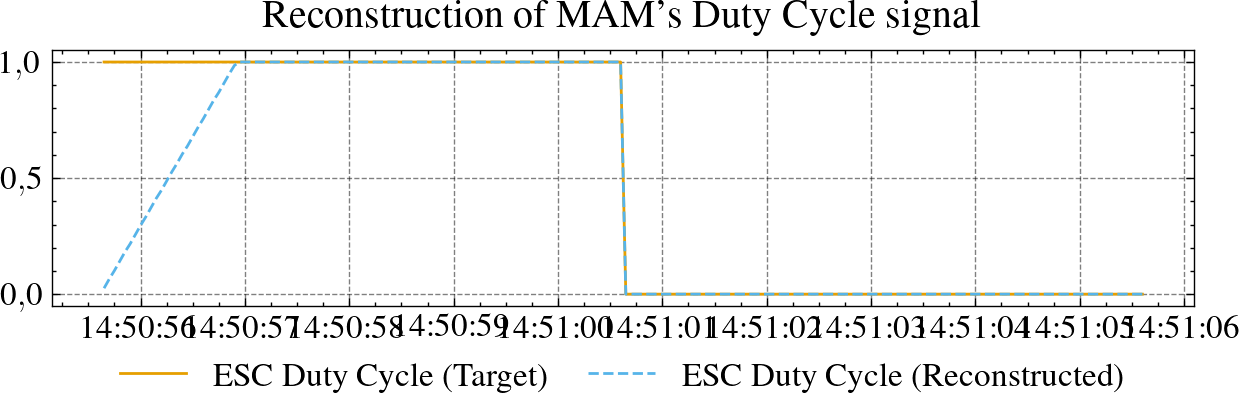

,d_target,i_target,d_corrupted,d_reconstructed,d_reconstructed_corrupted
count,200.000000,200.000000,16.000000,200.000000,200.000000
mean,0.500000,0.039216,0.250980,0.435820,0.245471
std,0.501255,0.000000,0.259211,0.474652,0.266658
min,0.000000,0.039216,0.000000,0.000000,0.000000
25%,0.000000,0.039216,0.000000,0.000000,0.000000
50%,0.500000,0.039216,0.250980,0.012739,0.017647
75%,1.000000,0.039216,0.501961,1.000000,0.501961
max,1.000000,0.039216,0.501961,1.000000,0.976471


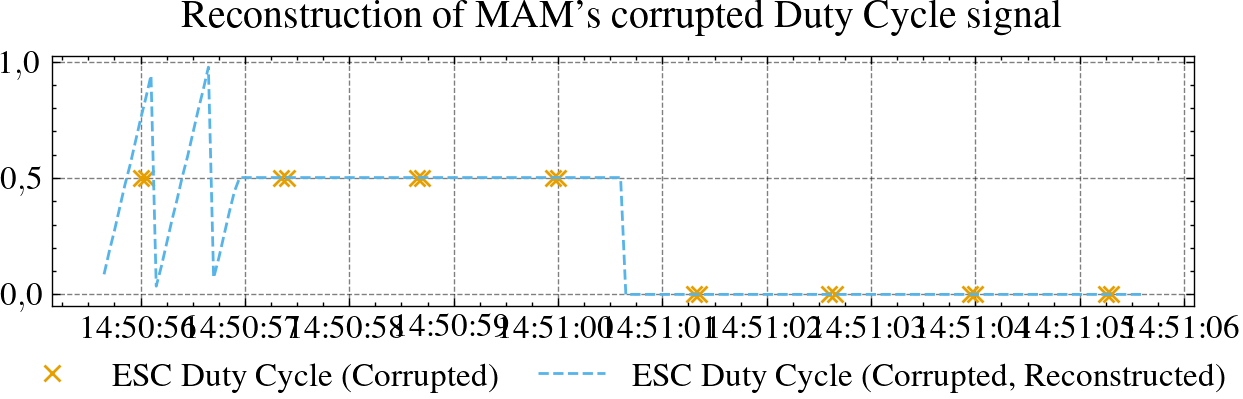

,d_target,i_target,d_corrupted,d_reconstructed
count,200.000000,200.000000,16.000000,200.000000
mean,0.500000,0.039216,0.250980,0.435820
std,0.501255,0.000000,0.259211,0.474652
min,0.000000,0.039216,0.000000,0.000000
25%,0.000000,0.039216,0.000000,0.000000
50%,0.500000,0.039216,0.250980,0.012739
75%,1.000000,0.039216,0.501961,1.000000
max,1.000000,0.039216,0.501961,1.000000


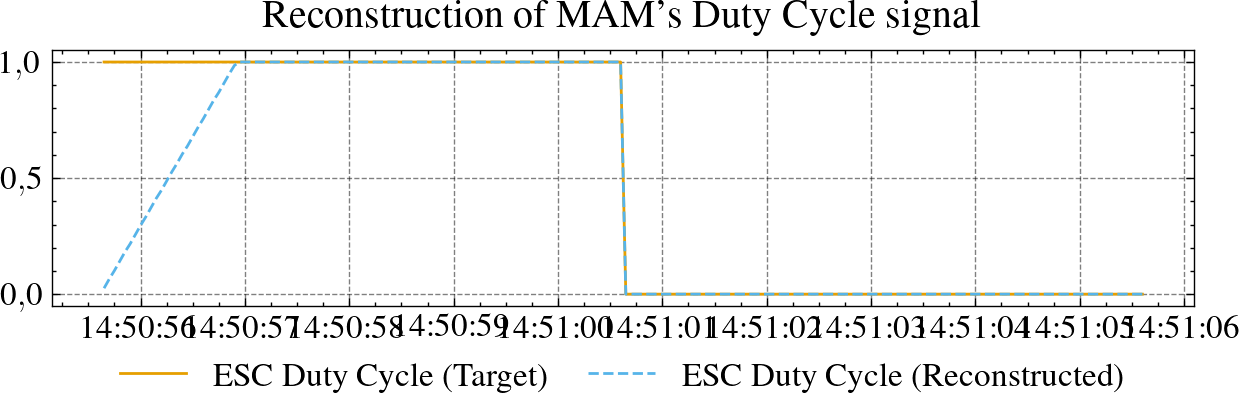

,d_target,i_target,d_corrupted,d_reconstructed,d_reconstructed_corrupted
count,200.000000,200.000000,16.000000,200.000000,200.000000
mean,0.500000,0.039216,0.250980,0.435820,0.245471
std,0.501255,0.000000,0.259211,0.474652,0.266658
min,0.000000,0.039216,0.000000,0.000000,0.000000
25%,0.000000,0.039216,0.000000,0.000000,0.000000
50%,0.500000,0.039216,0.250980,0.012739,0.017647
75%,1.000000,0.039216,0.501961,1.000000,0.501961
max,1.000000,0.039216,0.501961,1.000000,0.976471


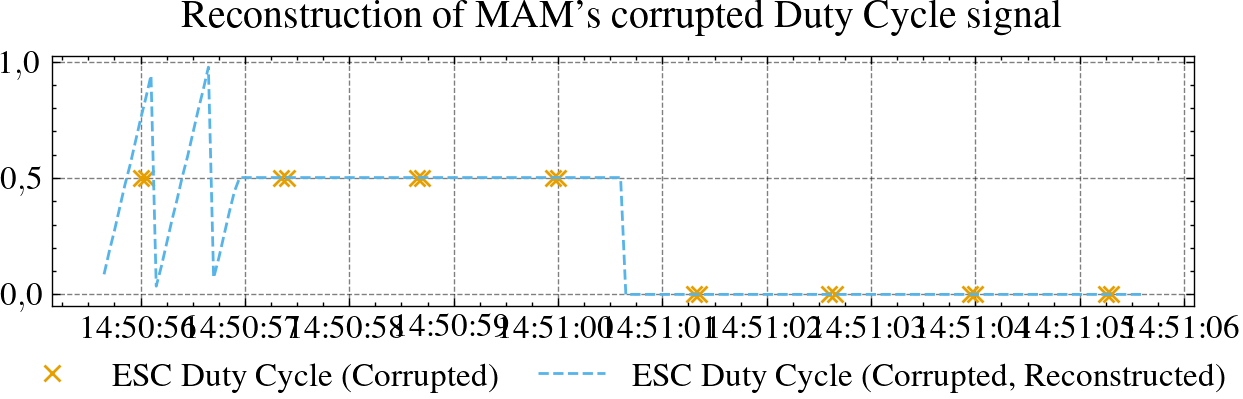

,d_target,i_target,d_corrupted,d_reconstructed
count,4001.000000,4001.000000,328.000000,4001.000000
mean,0.607649,0.039216,0.456002,0.603264
std,0.318227,0.000000,0.244068,0.321870
min,0.000000,0.039216,0.000000,0.000000
25%,0.447059,0.039216,0.296078,0.444268
50%,0.666667,0.039216,0.501961,0.667197
75%,1.000000,0.039216,0.662745,1.000000
max,1.000000,0.039216,0.941176,1.000000


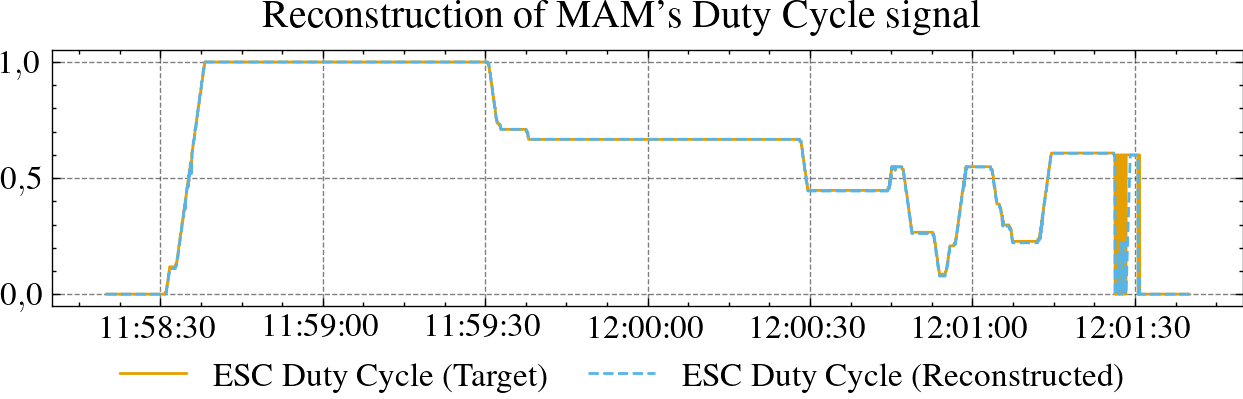

,d_target,i_target,d_corrupted,d_reconstructed,d_reconstructed_corrupted
count,4001.000000,4001.000000,328.000000,4001.000000,4001.000000
mean,0.607649,0.039216,0.456002,0.603264,0.462478
std,0.318227,0.000000,0.244068,0.321870,0.239306
min,0.000000,0.039216,0.000000,0.000000,0.000000
25%,0.447059,0.039216,0.296078,0.444268,0.368627
50%,0.666667,0.039216,0.501961,0.667197,0.501961
75%,1.000000,0.039216,0.662745,1.000000,0.662745
max,1.000000,0.039216,0.941176,1.000000,1.000000


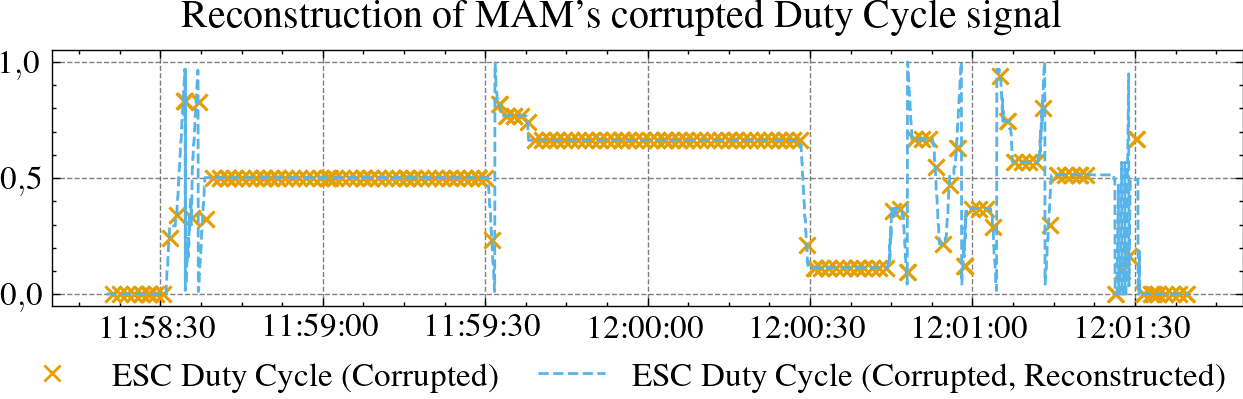

In [16]:
%matplotlib inline

argmin = int((df[system_data["ESC Duty Cycle (MSWI)"]].diff() / df.index.diff().mean().total_seconds()).argmin())
y = df.iloc[(argmin-100):(argmin+100)]
t_start_min = y.index.min()
t_end_min = y.index.max()

argmax = int((df[system_data["ESC Duty Cycle (MSWI)"]].diff() / df.index.diff().mean().total_seconds()).argmax())
y = df.iloc[(argmin-100):(argmin+100)]
t_start_max = y.index.min()
t_end_max = y.index.max()

t_start = pd.Timestamp("2020-02-02 11:58:20")
t_end = pd.Timestamp("2020-02-02 12:01:40")

for (start,end) in [
    (t_start_min, t_end_min),
    (t_start_max, t_end_max),
    (t_start, t_end),
]:
    
    df_section = df.loc[start:end, [system_data["ESC Duty Cycle (MIC+MSWI)"], system_data["ESC Ramp (MIC+MSWI)"], "MIC19__MOTOR__MOTOR__MOTOR_ON", "MIC19__MOTOR__MOTOR__DMS_ON", system_data["ESC Duty Cycle (MAM)"]]]

    df_section = df_section.rename(columns={
        system_data["ESC Duty Cycle (MIC+MSWI)"]: "d_target",
        system_data["ESC Ramp (MIC+MSWI)"]: "i_target",
        "MIC19__MOTOR__MOTOR__MOTOR_ON": "motor_on",
        "MIC19__MOTOR__MOTOR__DMS_ON": "dms",
        system_data["ESC Duty Cycle (MAM)"]: "d_corrupted",
    })

    sample_rate_hz = 20
    assert sample_rate_hz == (1 / df_section.index.diff().mean().total_seconds())

    df_section["d_reconstructed"], final_state = simulate_applied_duty_cycle(
        desired_d_norm_samples=df_section["d_target"],
        i_target_norm_samples=df_section["i_target"],
        motor_on_samples=df_section["motor_on"],
        dms_samples=df_section["dms"],
        fault_samples=None,
        sample_rate_hz=sample_rate_hz,
        simulate_overflow=False,
    )

    display(df_section.describe())

    fig = plt.figure(figsize=figsize(subplots=(0.4, 1)))
    plt.plot(
        df_section.index,
        df_section["d_target"],
        label="ESC Duty Cycle (Target)",
    )
    plt.plot(
        df_section.index,
        df_section["d_reconstructed"],
        label="ESC Duty Cycle (Reconstructed)",
    )
    fig_save_and_show(
        filename=None,#f"{latex_img_path}/transformation_duty_cycle_reconstruction.pdf",
        save_title="Reconstrução do sinal do Duty Cycle do MAM",
        show_title="Reconstruction of MAM's Duty Cycle signal",
        fig=fig,
        ncol=2,
    )

    df_section["d_reconstructed_corrupted"], final_state = simulate_applied_duty_cycle(
        desired_d_norm_samples=df_section["d_target"],
        i_target_norm_samples=df_section["i_target"],
        motor_on_samples=df_section["motor_on"],
        dms_samples=df_section["dms"],
        fault_samples=None,
        sample_rate_hz=sample_rate_hz,
        simulate_overflow=True,
    )

    display(df_section.describe())

    fig = plt.figure(figsize=figsize(subplots=(0.4, 1)))
    plt.plot(
        df_section.index,
        df_section["d_corrupted"],
        'x',
        label="ESC Duty Cycle (Corrupted)",
    )
    plt.plot(
        df_section.index,
        df_section["d_reconstructed_corrupted"],
        label="ESC Duty Cycle (Corrupted, Reconstructed)",
    )
    fig_save_and_show(
        filename=None,#f"{latex_img_path}/transformation_duty_cycle_reconstruction.pdf",
        save_title="Reconstrução do sinal corrompido do Duty Cycle do MAM",
        show_title="Reconstruction of MAM's corrupted Duty Cycle signal",
        fig=fig,
        ncol=2,
    )

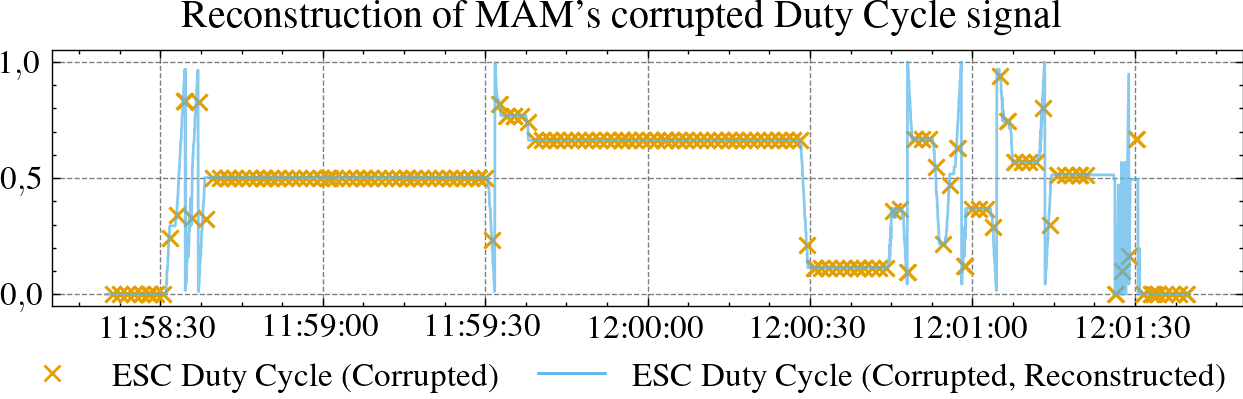

In [17]:
applied, final_state = simulate_applied_duty_cycle(
    desired_d_norm_samples=df[system_data["ESC Duty Cycle (MIC+MSWI)"]],
    i_target_norm_samples=df[system_data["ESC Ramp (MIC+MSWI)"]],
    motor_on_samples=df["MIC19__MOTOR__MOTOR__MOTOR_ON"],
    dms_samples=df["MIC19__MOTOR__MOTOR__DMS_ON"],
    fault_samples=None,
    sample_rate_hz=20,
    simulate_overflow=True,
)

if "MIC19__MOTOR__D__CORRUPTED" not in df.columns:
    df["MIC19__MOTOR__D__CORRUPTED"] = df["MIC19__MOTOR__D"].copy()

system_data["ESC Duty Cycle (Corrupted, Reconstructed)"] = "MAM19__MOTOR__D__APPLIED__CORRUPTED"
df[system_data["ESC Duty Cycle (Corrupted, Reconstructed)"]] = applied

t_start = pd.Timestamp("2020-02-02 11:58:20")
t_end = pd.Timestamp("2020-02-02 12:01:40")

df_local = df.loc[t_start:t_end]
fig = plt.figure(figsize=figsize(subplots=(0.4, 1)))
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (MAM)"]],
    'x',
    label="ESC Duty Cycle (Corrupted)",
)
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (Corrupted, Reconstructed)"]],
    label="ESC Duty Cycle (Corrupted, Reconstructed)",
    linestyle="solid",
    alpha=0.7,
)

fig_save_and_show(
    filename=f"{latex_img_path}/transformation_corrupted_duty_cycle_reconstruction.pdf",
    save_title="Reconstrução do sinal corrompido do Duty Cycle do MAM",
    show_title="Reconstruction of MAM's corrupted Duty Cycle signal",
    fig=fig,
    ncol=2,
)

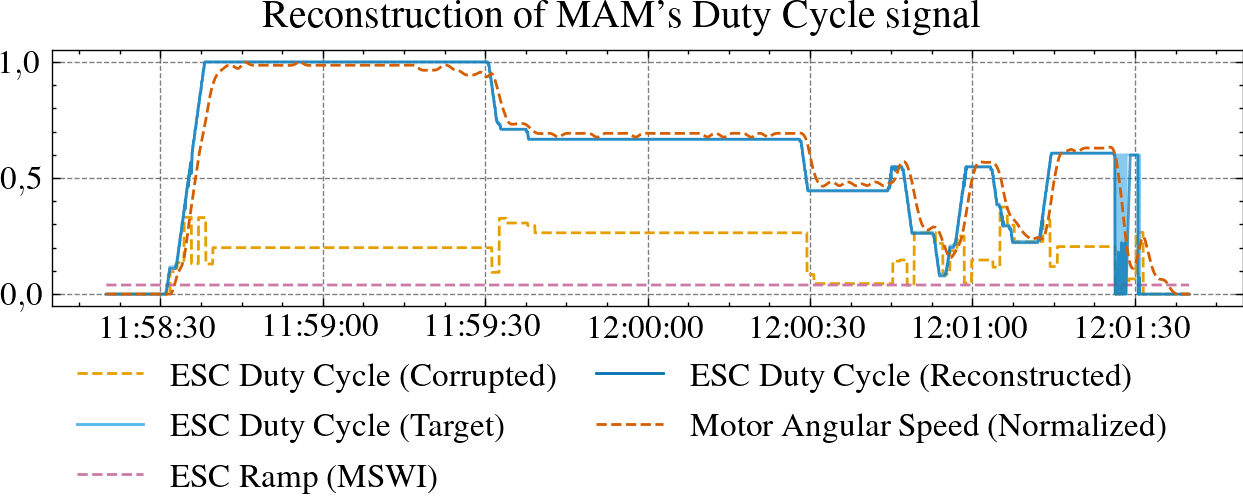

In [18]:
applied, final_state = simulate_applied_duty_cycle(
    desired_d_norm_samples=df[system_data["ESC Duty Cycle (MIC+MSWI)"]],
    i_target_norm_samples=df[system_data["ESC Ramp (MIC+MSWI)"]],
    motor_on_samples=df["MIC19__MOTOR__MOTOR__MOTOR_ON"],
    dms_samples=df["MIC19__MOTOR__MOTOR__DMS_ON"],
    fault_samples=None,
    sample_rate_hz=20,
    simulate_overflow=False,
)

system_data["ESC Duty Cycle (Reconstructed)"] = "MAM19__MOTOR__D__APPLIED"
df[system_data["ESC Duty Cycle (Reconstructed)"]] = applied

t_start = pd.Timestamp("2020-02-02 11:58:20")
t_end = pd.Timestamp("2020-02-02 12:01:40")

df_local = df.loc[t_start:t_end]
fig = plt.figure(figsize=figsize(subplots=(0.4, 1)))
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (MAM)"]].ffill() * 255 / 640,
    label="ESC Duty Cycle (Corrupted)",
    linestyle="dashed",
)
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (MIC+MSWI)"]],
    label="ESC Duty Cycle (Target)",
    linestyle="solid",
    alpha=0.7,
)
plt.plot(
    df_local.index,
    df_local[system_data["ESC Ramp (MSWI)"]],
    label="ESC Ramp (MSWI)",
    linestyle="dashed",
)
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (Reconstructed)"]],
    label="ESC Duty Cycle (Reconstructed)",
    linestyle="solid",
    alpha=0.7,
)
plt.plot(
    df_local.index,
    df_local[system_data["Motor Angular Speed"]]
    / df_local[system_data["Motor Angular Speed"]].max(),
    label="Motor Angular Speed (Normalized)",
    linestyle="dashed",
)

fig_save_and_show(
    filename=f"{latex_img_path}/transformation_duty_cycle_reconstruction.pdf",
    save_title="Reconstrução do sinal do Duty Cycle do MAM",
    show_title="Reconstruction of MAM's Duty Cycle signal",
    fig=fig,
    ncol=2,
)

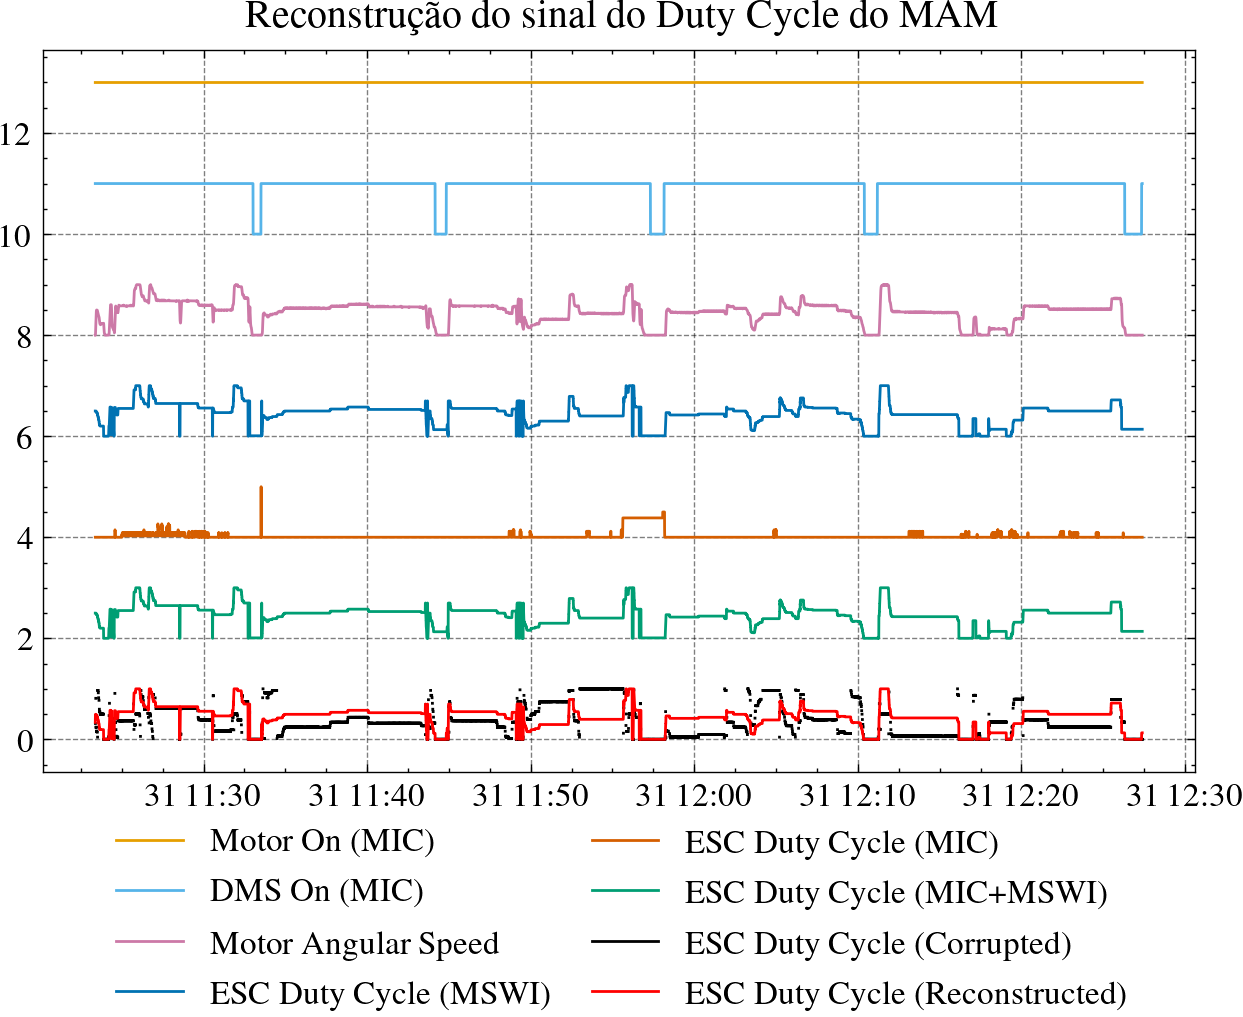

In [19]:
# From the Motor Angular Speed signal, we can observe that even after combining both Duty Cycles, there are still parts
# where the motor doesn't spin when the duty-cycle is above zero. We can just multiply both signals to get the actual
# Duty Cycle applied by MAM.
t_start, t_end = events.loc["03.Revezamento"]
df_local = df.loc[t_start:t_end]

fig = plt.figure(figsize=figsize())
plt.plot(
    df_local.index,
    12 + df_local[system_data["ESC Motor On (MIC)"]],
    label="Motor On (MIC)",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    10 + df_local[system_data["ESC DMS On (MIC)"]],
    label="DMS On (MIC)",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    8
    + df_local[system_data["Motor Angular Speed"]]
    / df_local[system_data["Motor Angular Speed"]].max(),
    label="Motor Angular Speed",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    6
    + df_local[system_data["ESC Duty Cycle (MSWI)"]]
    / df_local[system_data["ESC Duty Cycle (MSWI)"]].max(),
    label="ESC Duty Cycle (MSWI)",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    4
    + df_local[system_data["ESC Duty Cycle (MIC)"]]
    / df_local[system_data["ESC Duty Cycle (MIC)"]].max(),
    label="ESC Duty Cycle (MIC)",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    2 + df_local[system_data["ESC Duty Cycle (MIC+MSWI)"]],
    label="ESC Duty Cycle (MIC+MSWI)",
    linestyle="solid",
)

plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (MAM)"]],
    color="k",
    label="ESC Duty Cycle (Corrupted)",
    linestyle="solid",
)
plt.plot(
    df_local.index,
    df_local[system_data["ESC Duty Cycle (Reconstructed)"]],
    color="red",
    label="ESC Duty Cycle (Reconstructed)",
    linestyle="solid",
)
fig_save_and_show(
    filename=f"{latex_img_path}/dataset_duty_cycle_fix.pdf",
    save_title="Reconstruction of MAM's Duty Cycle signal",
    show_title="Reconstrução do sinal do Duty Cycle do MAM",
    fig=fig,
    ncol=2,
)

system_data["ESC Duty Cycle"] = system_data["ESC Duty Cycle (Reconstructed)"]

### Battery Voltage

We want the battery pack voltage, but we have two problems:

1. The cells sensors (`MSC19_1`, `MSC19_2` and `MSC19_3`) are sometimes faulty, possibly due to bad connections under shaking/vibration.
2. In the other hand, the pack sensor from `MCS19` is noiseless but it's uncallibrated.
3. MCCs also measure the pack voltage, but they are not as well callibrated, and are also a bit noisy even after the filtering done in the resampling stage.
4. Although MCB also measures the pack voltage, it is normally disconnected from it, only connecting to it via a relay that only turns on when it's recharging the auxiliary battery, so we can't use it here.

Some additional information:

1. Both MCC and MCB measure the battery directly from a resistor divider passing to a buffer lm324 opamp. We probably have added a small capacitor as a first-order low-pass filter, but it's no on its schematics;
2. MCB is always connected to the main battery, the relay was actually on its output (to the auxiliary battery). The fact the the signal is not available is due to an error in the firmware;
3. MSC and MCS use an lm324 opamp with a differential-pair topology, cascated to a 3rd-order low-pass sallen-key filter;
4. MSC was not only callibrated, but linearized using piece-wise third-order polynomials, so it's very unlikely for them to be wrong;
5. MCS was not linearized nor callibrated.

To deal with it, we can callibrate `MCS19` based on the average of the sum of the cell sensors (`MSC19`):


In [20]:
from collections.abc import Iterable

# First, a quick data cleaning:from collections.abc import Iterable


# First, a quick data cleaning:
def mask_stuck_runs(
    df: pd.DataFrame,
    cols,
    *,
    tol: float = 0.0,
    min_samples: int = 30,
    keep_first: bool = True,
) -> None:
    if isinstance(cols, str):
        cols = [cols]

    for c in cols:
        a = df[c].to_numpy(copy=False)
        if a.size < 2:
            continue
        if not np.issubdtype(a.dtype, np.number):
            continue

        prev = a[:-1]
        cur = a[1:]

        same = np.isfinite(prev) & np.isfinite(cur) & (np.abs(cur - prev) <= tol)

        n = a.size
        change_idx = (
            np.flatnonzero(~same) + 1
        )  # indices in [1..n-1] where a changes (or NaN breaks)

        boundaries = np.empty(change_idx.size + 2, dtype=np.int64)
        boundaries[0] = 0
        boundaries[1:-1] = change_idx
        boundaries[-1] = n

        for start, end in zip(boundaries[:-1], boundaries[1:]):
            run_len = end - start
            if run_len >= min_samples:
                s = start + (1 if keep_first else 0)
                if s < end:
                    a[s:end] = np.nan


def mask_impulse_spikes(
    df: pd.DataFrame,
    cols,
    *,
    diff_window: int = 100,
    sigma_mult: float = 10.0,
) -> None:
    """
    Remove impulse (jump) spikes from time series by thresholding the first difference.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with a DatetimeIndex (required if interp_method='time').
    cols : str or iterable[str]
        Column(s) to process.
    diff_window : int
        Window for robust scale (rolling median of |dx|).
    sigma_mult : float
        Multiplier for spike detection threshold.
    interp : bool
        Whether to interpolate small gaps after masking.
    interp_limit : int
        Max consecutive samples to interpolate.
    interp_method : str
        'time' (requires DatetimeIndex) or 'linear'.
    """
    if isinstance(cols, str):
        cols = [cols]
    elif not isinstance(cols, Iterable):
        raise TypeError("cols must be a column name or iterable of column names")

    cols = list(cols)

    # First difference magnitude
    dx = df[cols].diff().abs()

    # Robust local scale (median absolute diff)
    scale = dx.rolling(
        diff_window,
        center=True,
        min_periods=max(5, diff_window // 10),
    ).median()

    # Detect impulses
    bad = dx > (sigma_mult * scale)

    # Mask both sides of the jump
    bad = bad | bad.shift(-1, fill_value=False)

    # Apply mask
    df.loc[:, cols] = df[cols].mask(bad)


def mask_outliers(
    df: pd.DataFrame,
    cols,
    *,
    window: int = 200,
    q_lo: float = 0.01,
    q_hi: float = 0.99,
    center: bool = True,
    min_periods: int | None = None,
    min_finite: int | None = None,
    mask_when_band_nan: bool = True,
) -> None:
    if isinstance(cols, str):
        cols = [cols]
    cols = list(cols)

    if min_periods is None:
        min_periods = max(10, window // 10)
    if min_finite is None:
        min_finite = min_periods

    X = df[cols].astype("float64", copy=False)

    roll = X.rolling(window, center=center, min_periods=min_periods)
    lo = roll.quantile(q_lo)
    hi = roll.quantile(q_hi)
    cnt = roll.count()  # finite samples in window

    finite = np.isfinite(X)
    bad = ~finite | (X < lo) | (X > hi)

    if mask_when_band_nan:
        band_bad = lo.isna() | hi.isna() | (cnt < min_finite)
        bad = bad | (finite & band_bad)

    df.loc[:, cols] = X.mask(bad)


def mask_outside_physical_limits(
    df: pd.DataFrame,
    cols,
    *,
    lo: float | None = None,
    hi: float | None = None,
    also_nan_inf: bool = True,
) -> None:
    """
    In-place: set samples outside [lo, hi] to NaN.

    - cols: str or list[str]
    - lo/hi: physical limits (use None to disable one side)
    - also_nan_inf: also NaN +-inf (and keep existing NaNs)
    """
    if isinstance(cols, str):
        cols = [cols]
    cols = list(cols)

    X = df[cols].to_numpy(dtype=np.float64, copy=False)

    bad = np.zeros(X.shape, dtype=bool)
    if lo is not None:
        bad |= X < lo
    if hi is not None:
        bad |= X > hi
    if also_nan_inf:
        bad |= ~np.isfinite(X)

    X[bad] = np.nan
    df.loc[:, cols] = X


# Here we remove some incorrectly forward-filled sections
mask_stuck_runs(
    df=df,
    cols=[
        *system_data["MPPT Output Voltage"],
        *system_data["MPPT Input Voltage"],
        *system_data["MPPT Input Current"],
    ],
    tol=1e-6,
    min_samples=5 * 20,  # 20 @ 50ms is 1s
)

# mask_impulse_spikes(
#     df=df,
#     cols=cols,
#     diff_window=100, # 100 @ 50ms is 5s
#     sigma_mult=5,
# )

# mask_outliers(
#     df=df,
#     cols=cols,
#     window=200,
#     q_lo=0.01,
#     q_hi=0.99,
#     min_periods=50,
#     min_finite=50,
#     mask_when_band_nan=True,
# )

# df.loc[:, cols] = df[cols].interpolate(
#     method='time',
#     limit=20, # 20 @ 50ms is 1s
#     limit_area="inside",
#     limit_direction="both",
# )

# t_start = pd.Timestamp("2020-01-30 13:00:00")
# t_end = pd.Timestamp("2020-01-30 14:00:00")

# plt.figure(figsize=(15,4))
# plt.title('MPPT Input Current')
# plt.scatter(df.index, df[system_data['MPPT Input Current'][0]])
# plt.xlabel('Time')
# plt.ylabel('Current [A]')
# plt.xlim([t_start, t_end])
# plt.show()

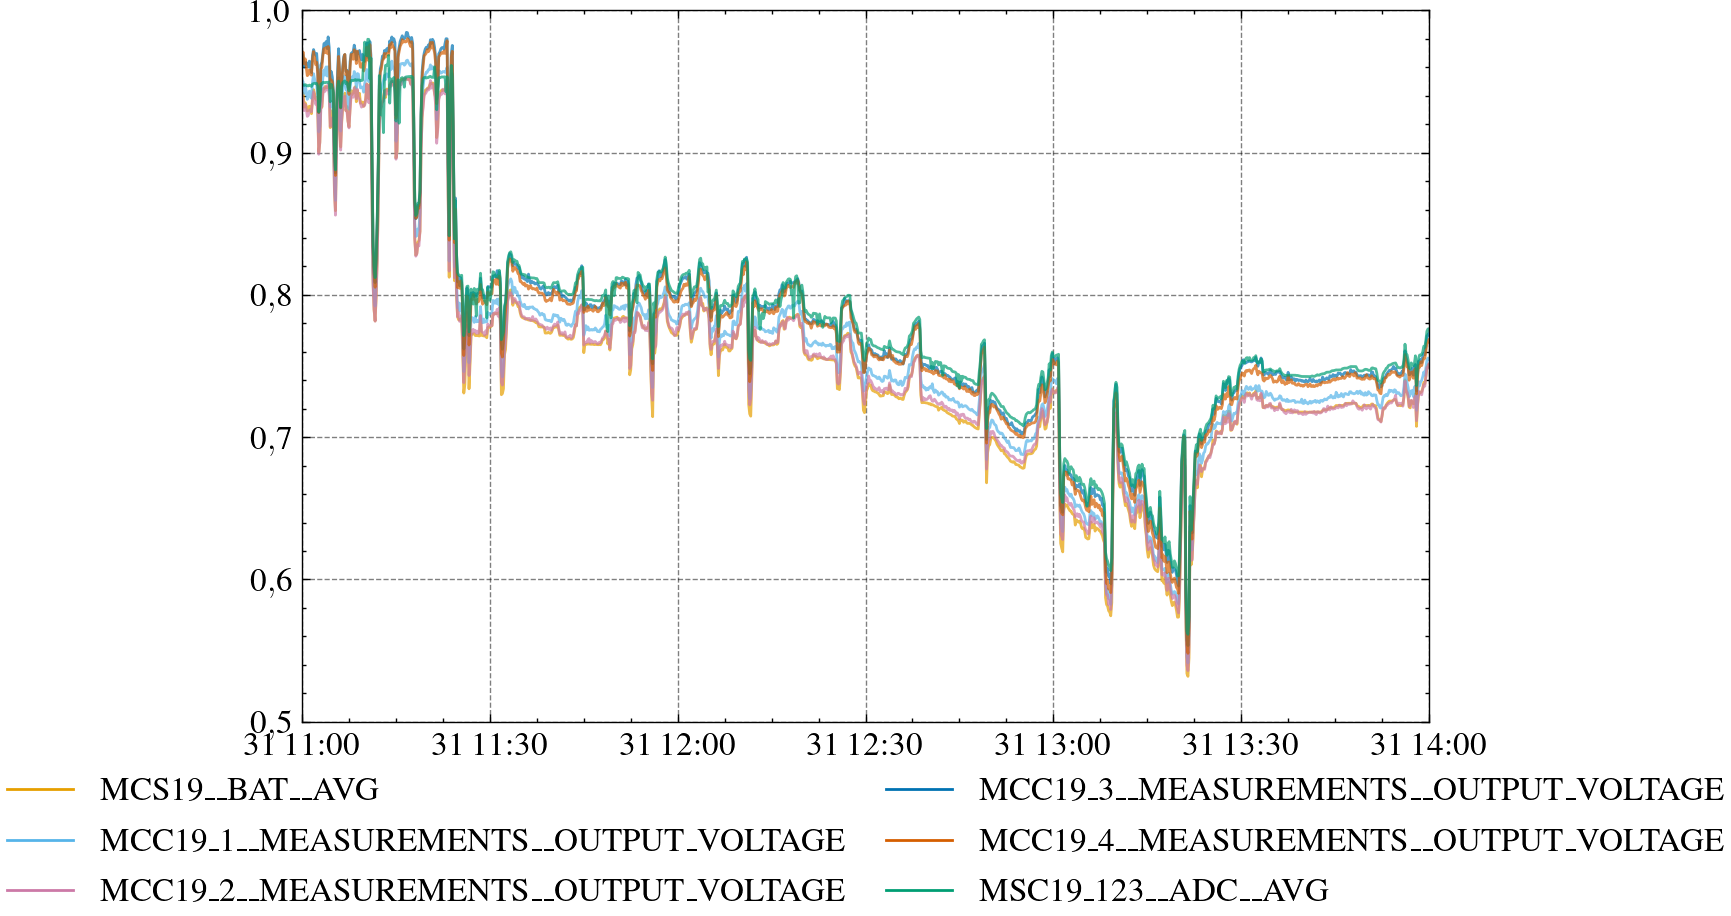

In [21]:
t_start = pd.Timestamp("2020-01-31 11:00:00")
t_end = pd.Timestamp("2020-01-31 14:00:00")

# Temporarily using a lower resolution dataset so we can deal with less noisy data
df_10s = load_dataset("10s")

system_data["Battery Pack Voltage (MSC)"] = "MSC19_123__ADC__AVG"
df[system_data["Battery Pack Voltage (MSC)"]] = df[
    system_data["Battery Cell Voltage (MSC)"]
].sum(axis=1)
df_10s[system_data["Battery Pack Voltage (MSC)"]] = df_10s[
    system_data["Battery Cell Voltage (MSC)"]
].sum(axis=1)

data = df_10s[
    [
        system_data["Battery Pack Voltage (MCS)"],
        *system_data["Battery Pack Voltage (MCC)"],
        # *system_data['Battery Cell Voltage (MSC)'],
        system_data["Battery Pack Voltage (MSC)"],
    ]
].copy()
data /= data.max()

fig = plt.figure(figsize=figsize())
plt.plot(df_10s.index, data, label=data.columns, linestyle="solid", alpha=0.7)
plt.xlim([t_start, t_end])
plt.ylim([0.5, 1])
fig_save_and_show(
    filename=None,
    show_title=None,
    save_title=None,
    fig=fig,
    ncols=2,
)

In [22]:
mcs = df[system_data["Battery Pack Voltage (MCS)"]]
msc_sum = df[system_data["Battery Cell Voltage (MSC)"]].sum(axis=1)

mask = mcs.notna() & msc_sum.notna() & (mcs > 5.0) & (msc_sum > 15.0)
k = (msc_sum[mask] / mcs[mask]).median()
print("k =", k, "samples =", int(mask.sum()))

mcs = mcs.interpolate(
    method="time", limit=1000, limit_area="inside", limit_direction="both"
)

system_data["Battery Pack Voltage"] = "MCS19__BAT__AVG__CALLIBRATED"
df[system_data["Battery Pack Voltage"]] = mcs * k

k = 0.0759619 samples = 484597


In [23]:
mcc_labels = system_data["MPPT Output Voltage"]

for mcc_label in mcc_labels:
    mcc = df[mcc_label]
    mask = mcc.notna() & msc_sum.notna() & (mcc > 15.0) & (msc_sum > 15.0)

    k = (msc_sum[mask] / mcc[mask]).median(axis=0)
    print(mcc_label, "k =", k, "samples =", int(mask.sum()))

    mcc = mcc.interpolate(
        method="time", limit=100, limit_area="inside", limit_direction="both"
    )

    df[mcc_label] = mcc * k

MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE k = 0.9833029201232755 samples = 1912818
MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE k = 0.9933043686731174 samples = 1674329
MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE k = 0.9664187553825756 samples = 1912824
MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE k = 0.9662815611868705 samples = 1912418


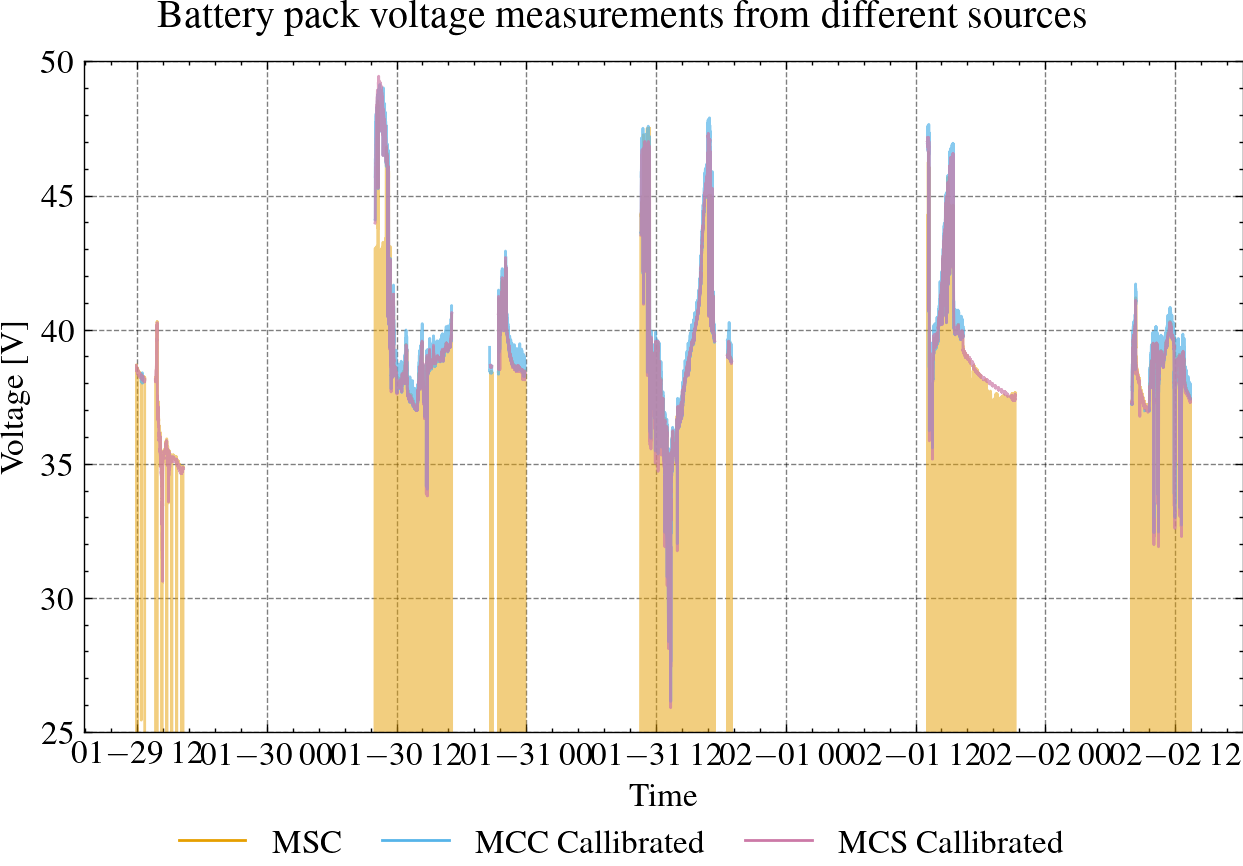

In [24]:
fig = plt.figure(figsize=figsize())
plt.plot(
    df.index,
    df[system_data["Battery Pack Voltage (MSC)"]],
    linestyle="solid",
    alpha=0.5,
    label="MSC",
)
plt.plot(
    df.index,
    df[system_data["MPPT Output Voltage"]].median(
        axis=1, skipna=False, numeric_only=True
    ),
    linestyle="solid",
    alpha=0.7,
    label="MCC Callibrated",
)
plt.plot(
    df.index,
    df[system_data["Battery Pack Voltage"]],
    linestyle="solid",
    alpha=0.7,
    label="MCS Callibrated",
)
plt.ylabel('Voltage [V]')
plt.xlabel('Time')
plt.ylim([25, 50])
fig_save_and_show(
    filename=f"{latex_img_path}/dataset_battery_voltage_from_different_sources.pdf",
    show_title="Battery pack voltage measurements from different sources",
    save_title="Medições da tensão do banco de baterias de diferentes fontes",
    fig=fig,
    ncols=3,
)

### MPPTs Current

The current of the MPPTs is in the wrong scale (10x bigger than it should), so we fix it by dividing each MPPT Input Current data by 10.


In [28]:
for current in system_data["MPPT Input Current"]:
    df[current] /= 10

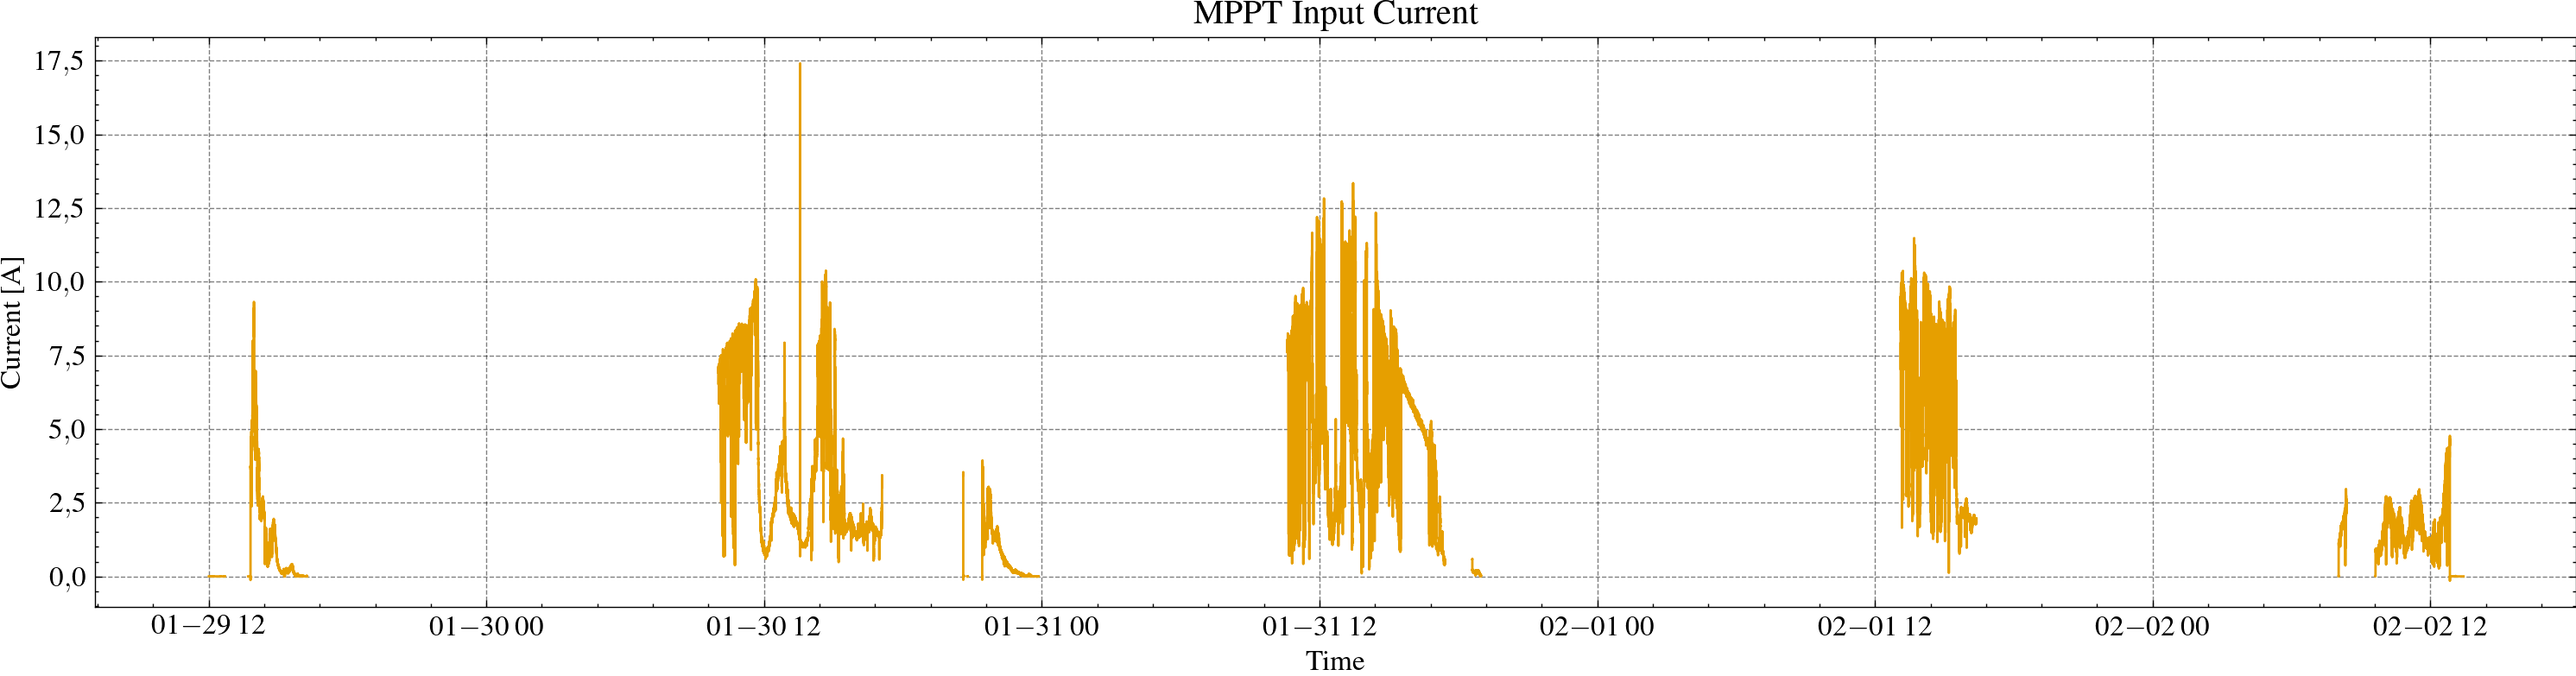

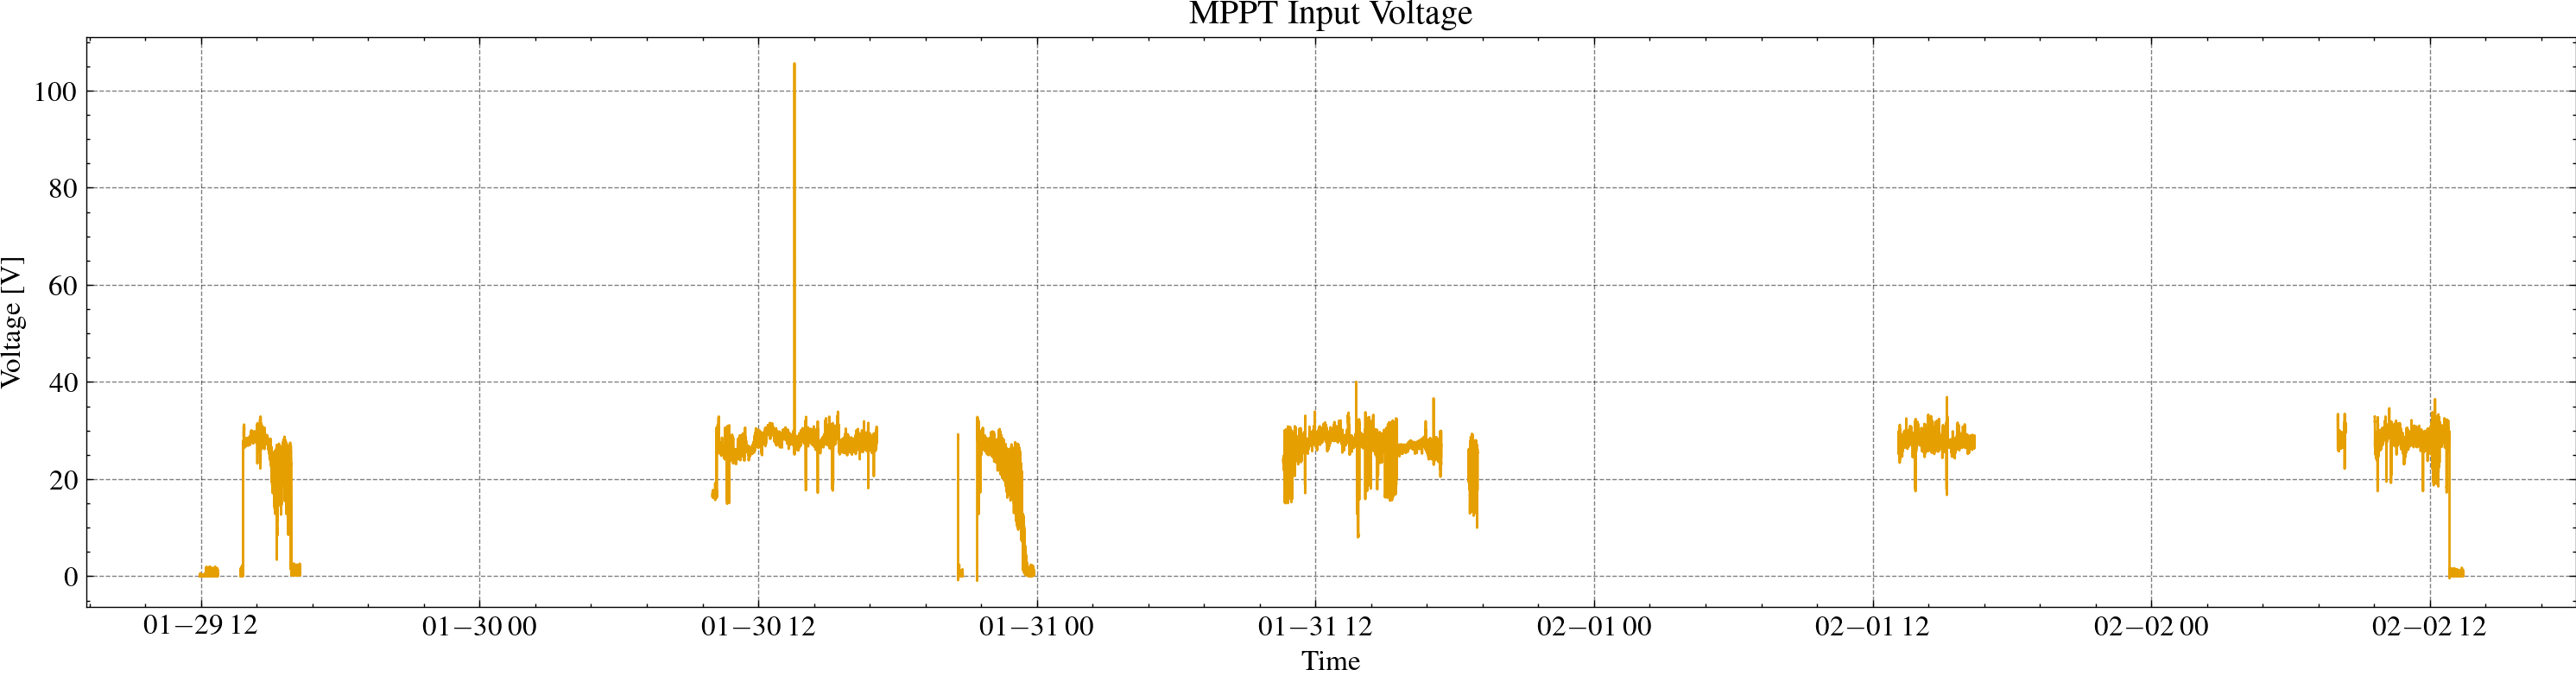

In [29]:
t_start = pd.Timestamp("2020-01-30 13:00:00")
t_end = pd.Timestamp("2020-01-30 14:00:00")

plt.figure(figsize=(15, 4))
plt.title("MPPT Input Current")
plt.plot(df.index, df[system_data["MPPT Input Current"][0]])
plt.xlabel("Time")
plt.ylabel("Current [A]")
# plt.xlim([t_start, t_end])
plt.show()

plt.figure(figsize=(15, 4))
plt.title("MPPT Input Voltage")
plt.plot(df.index, df[system_data["MPPT Input Voltage"][0]])
plt.xlabel("Time")
plt.ylabel("Voltage [V]")
# plt.xlim([t_start, t_end])
plt.show()

### MPPTs Power


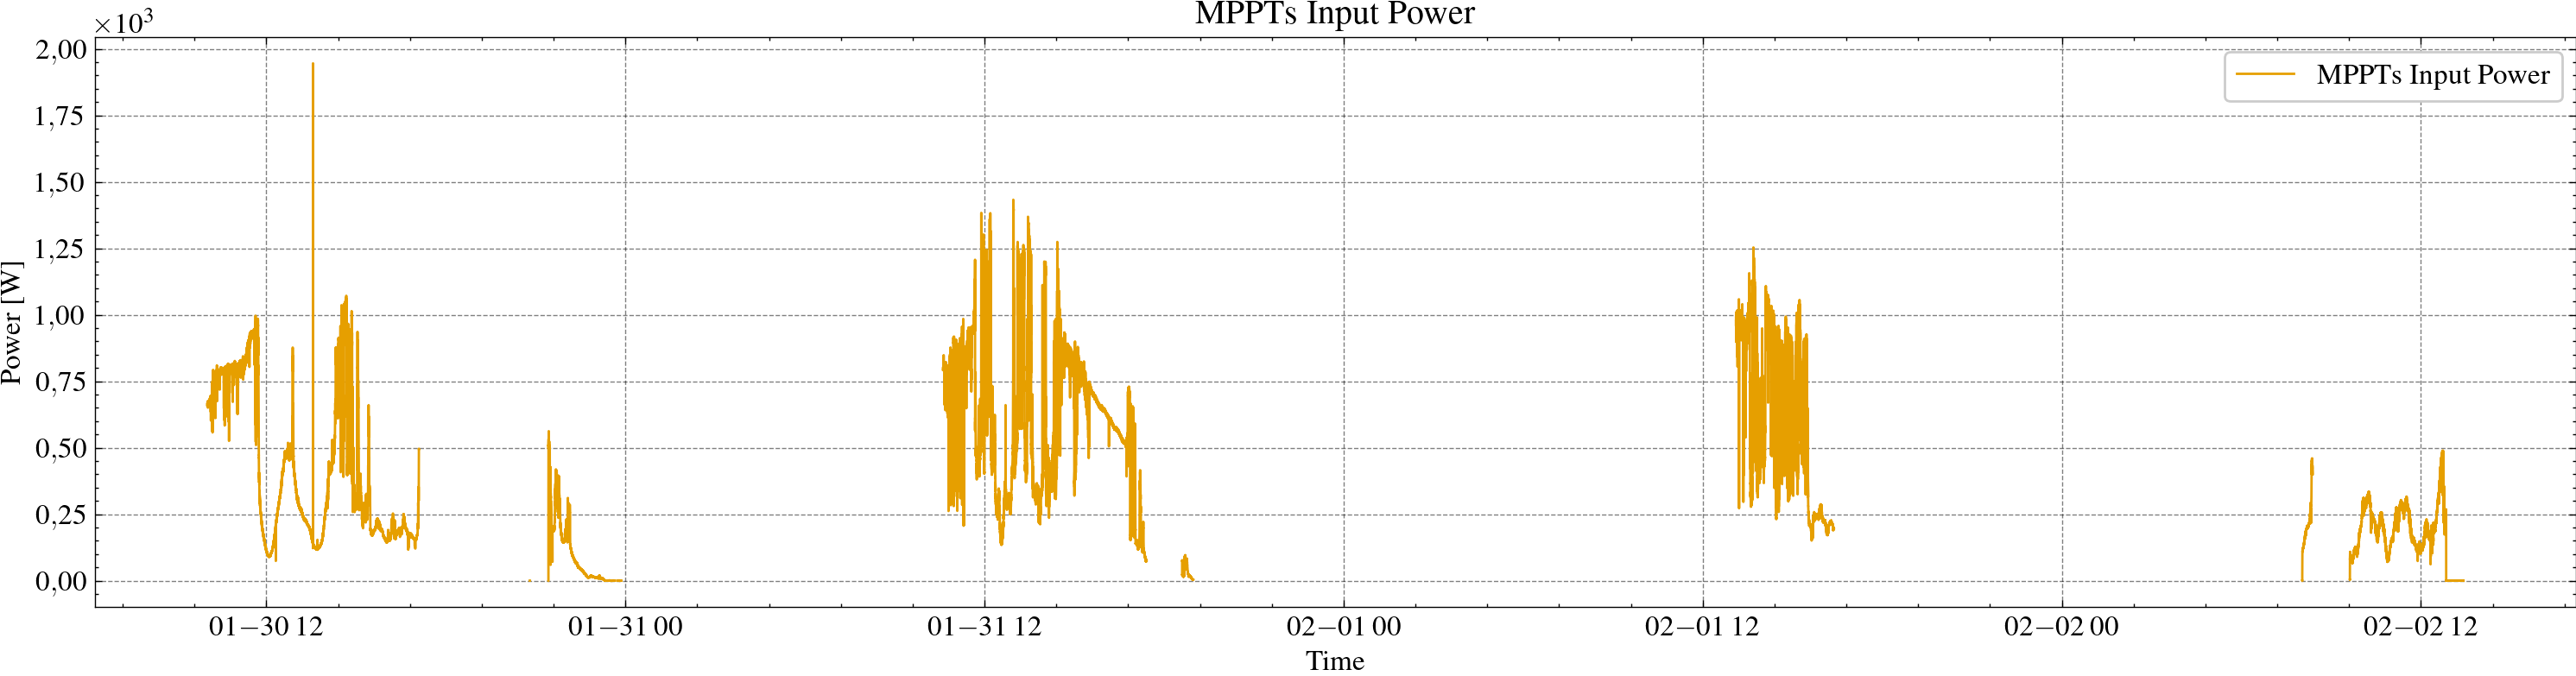

In [30]:
system_data["MPPT Input Power"] = [
    f"MCC19_{1+i}__COMPUTATIONS__INPUT_POWER"
    for i in range(len(system_data["MPPT Input Voltage"]))
]

for i, (current, voltage) in enumerate(
    zip(system_data["MPPT Input Current"], system_data["MPPT Input Voltage"])
):
    df[system_data["MPPT Input Power"][i]] = df[current] * df[voltage]

system_data["MPPTs Input Power"] = "MPPTs Input Power"
df[system_data["MPPTs Input Power"]] = df[system_data["MPPT Input Power"]].sum(
    axis=1, skipna=False
)

plt.figure(figsize=(15, 4))
plt.title("MPPTs Input Power")
plt.plot(df.index, df[system_data["MPPTs Input Power"]], label="MPPTs Input Power")
plt.xlabel("Time")
plt.ylabel("Power [W]")
plt.legend(loc="upper right")
plt.show()

#### Energy generation signals Cleanup


In [31]:
for i in range(4):
    bad_i = (df[system_data["MPPT Input Power"][i]] > 400)

    cols_i = [
        system_data["MPPT Input Voltage"][i],
        system_data["MPPT Output Voltage"][i],
        system_data["MPPT Input Power"][i],
        system_data["MPPTs Input Power"],
    ]
    df.loc[bad_i, cols_i] = np.nan

cols = [
    *system_data["MPPT Input Voltage"],
    *system_data["MPPT Output Voltage"],
    *system_data["MPPT Input Power"],
    system_data["MPPTs Input Power"],
]

df.loc[:, cols] = df[cols].interpolate(
    method="time",
    limit=20,  # 20 @ 50ms is 1s
    limit_area="inside",
    limit_direction="both",
)

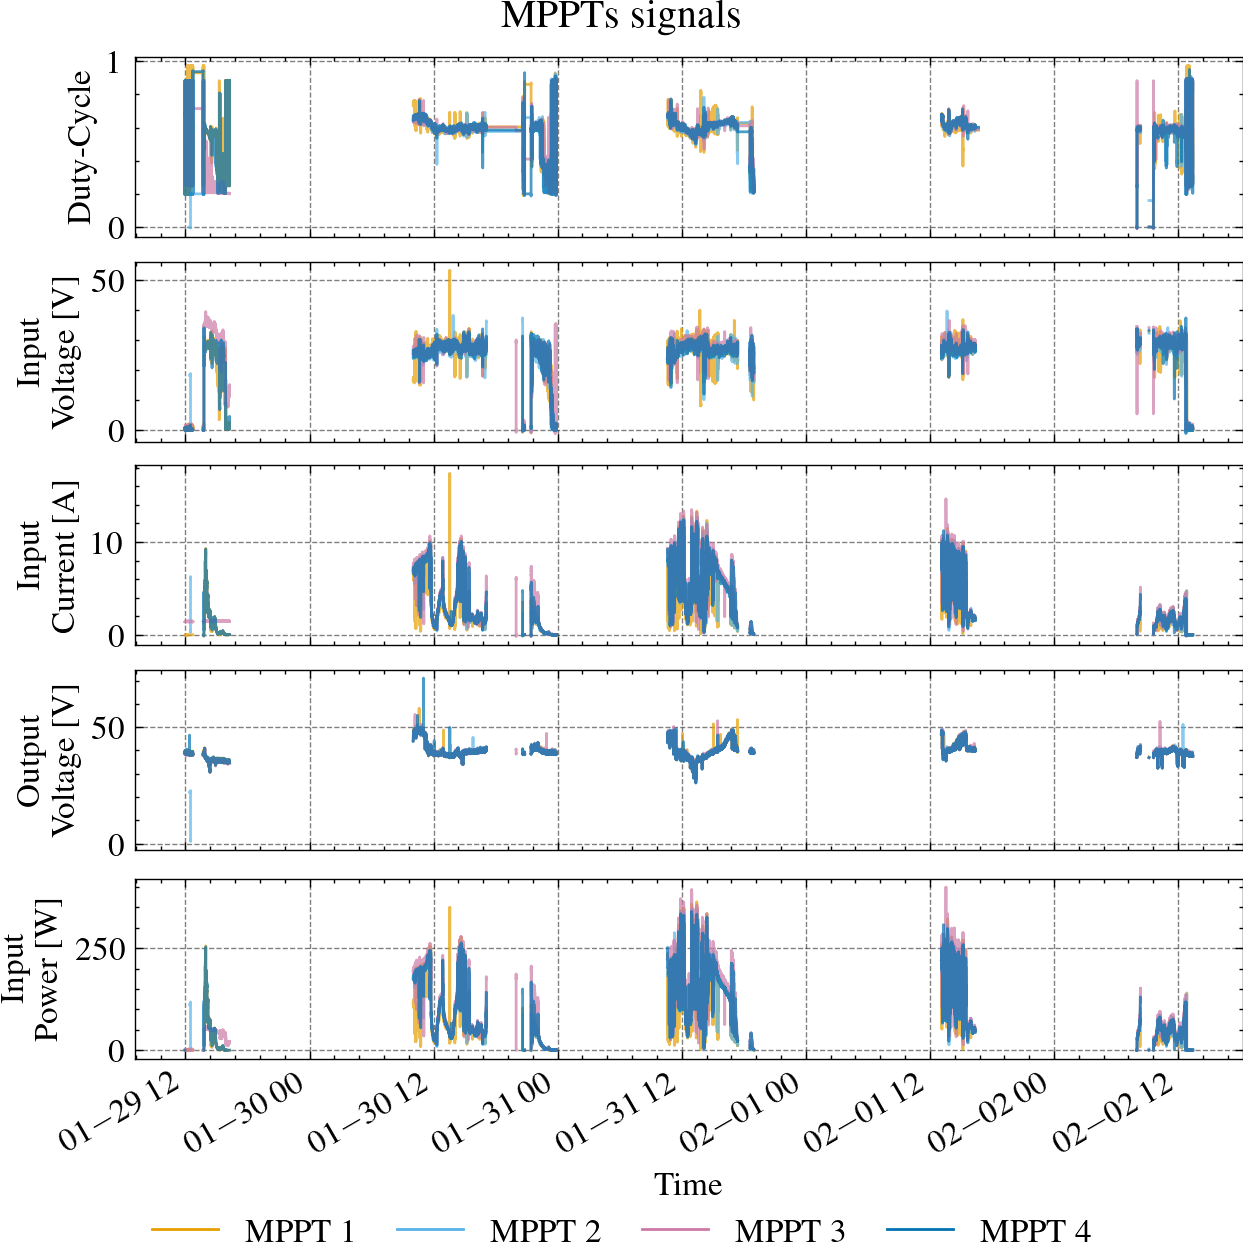

In [32]:
rows = 5
fig, ax = plt.subplots(rows, 1, figsize=figsize(subplots=(rows * 0.3, 1)), sharex=True)

plot_kwargs = dict(
    label=[f"MPPT {x+1}" for x in range(number_of_mppts)], linestyle="solid", alpha=0.7
)
ax[0].plot(df.index, df[system_data["MPPT Duty Cycle"]], **plot_kwargs)
ax[0].set_ylabel("\nDuty-Cycle")
ax[1].plot(df.index, df[system_data["MPPT Input Voltage"]], **plot_kwargs)
ax[1].set_ylabel("Input\nVoltage [V]")
ax[2].plot(df.index, df[system_data["MPPT Input Current"]], **plot_kwargs)
ax[2].set_ylabel("Input\nCurrent [A]")
ax[3].plot(df.index, df[system_data["MPPT Output Voltage"]], **plot_kwargs)
ax[3].set_ylabel("Output\nVoltage [V]")
ax[4].plot(df.index, df[system_data["MPPT Input Power"]], **plot_kwargs)
ax[4].set_ylabel("Input\nPower [W]")

ax[-1].set_xlabel("Time")
for label in ax[-1].get_xticklabels():
    label.set_rotation(30)
    label.set_ha("right")

fig_save_and_show(
    filename=None,
    show_title="MPPTs signals",
    save_title="Sinais dos MPPTs",
    fig=fig,
    ncols=4,
);

### Battery Currents Node


In [33]:
STATE_RUNNING = 2
system_data["Battery Input Current Sensor State == STATE_RUNNING"] = (
    "MSC19_4__STATE__STATE__RUNNING"
)
system_data["Battery Output Current Sensor State == STATE_RUNNING"] = (
    "MSC19_5__STATE__STATE__RUNNING"
)

df[system_data["Battery Input Current Sensor State"]] = df[
    system_data["Battery Input Current Sensor State"]
].ffill(
    limit=20, limit_area="inside"
)  # 20 @ 50ms -> 1s of gap
df[system_data["Battery Input Current Sensor State == STATE_RUNNING"]] = df[
    system_data["Battery Input Current Sensor State"]
].apply(lambda x: 1 if x == STATE_RUNNING else 0)

df[system_data["Battery Output Current Sensor State"]] = df[
    system_data["Battery Output Current Sensor State"]
].ffill(
    limit=20, limit_area="inside"
)  # 20 @ 50ms -> 1s of gap
df[system_data["Battery Output Current Sensor State == STATE_RUNNING"]] = df[
    system_data["Battery Output Current Sensor State"]
].apply(lambda x: 1 if x == STATE_RUNNING else 0)

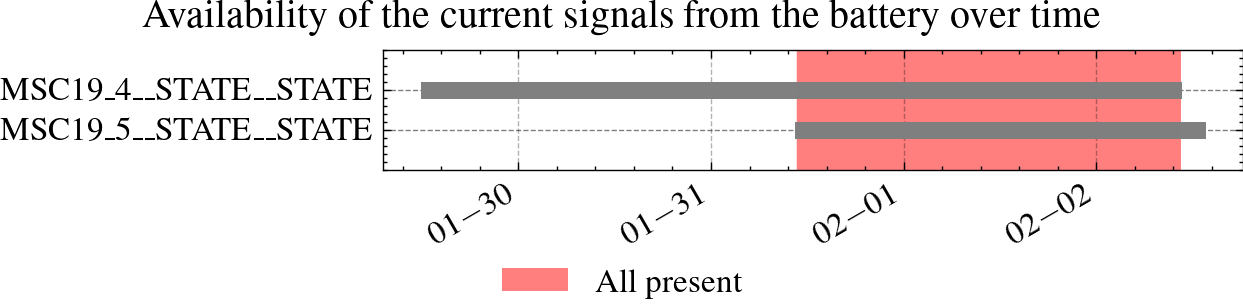

In [34]:
import matplotlib.dates as mdates

signatures = [
    system_data['Battery Input Current Sensor State'],
    system_data['Battery Output Current Sensor State'],
]
signatures_df = df[signatures].median().astype(np.uint8).sort_values()

labels = [label.replace("__STATE__SIGNATURE", '') for label in signatures_df.index]
ypos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=figsize(subplots=(0.28,1)))

for i, col in enumerate(labels):
    y = df[col].copy()
    mask = y.notna() & (np.isclose(y, y.median()))
    y[~mask] = np.nan
    y[mask] = ypos[i] + 0.5
    ax.scatter(df.index, y, color="gray", marker='|', alpha=0.5)

all_present = df[labels].notna().all(axis=1)
ax.fill_between(
    df.index,
    -0.5,
    len(labels) + 0.5,
    where=all_present,
    step="post",
    color="red",
    alpha=0.5,
    linewidth=0,
    zorder=0,
    label='All present'
)

ax.set_yticks(ypos + 0.5)
ax.set_yticklabels(labels)
ax.set_ylim(len(labels) + 0.5, -0.5)
ax.grid(True, axis="x", alpha=0.3)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.gcf().autofmt_xdate()

fig_save_and_show(
    filename=f"{latex_img_path}/battery_current_signals_availability.png",
    save_title="Disponibilidade dos sinais de corrente da bateria no tempo",
    show_title="Availability of the current signals from the battery over time",
    fig=fig,
    ncol=2,
)


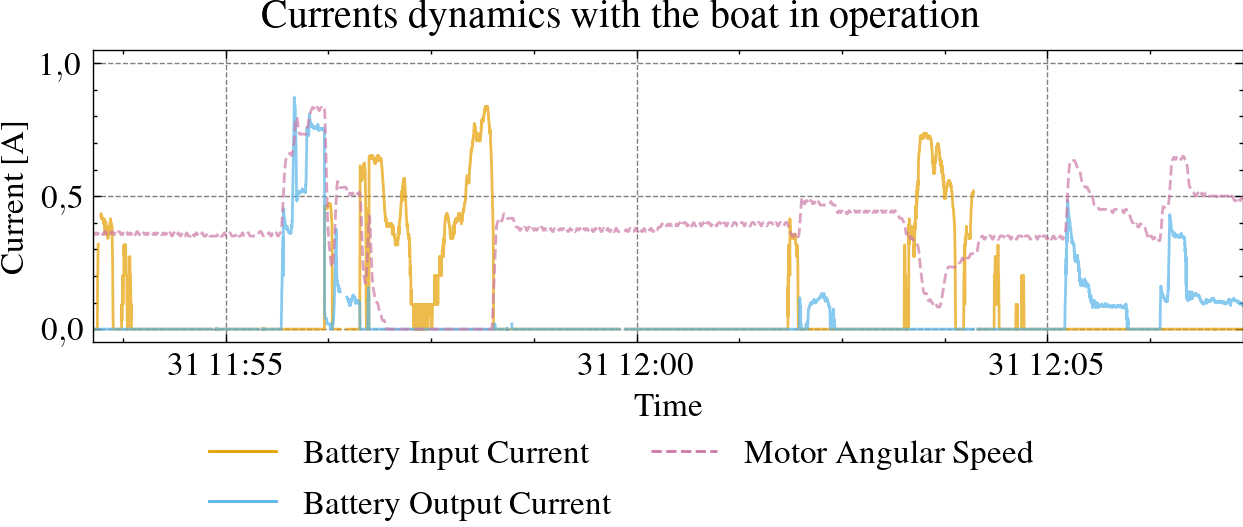

In [35]:
t_start, t_end = events.loc['03.Revezamento']
t_start +=  pd.Timedelta("30min")
t_end -= pd.Timedelta("20min")

fig = plt.figure(figsize=figsize(subplots=(0.5,1)))
plt.plot(df.index, df[system_data["Battery Input Current"]] / df[system_data["Battery Input Current"]].max(), label="Battery Input Current", linestyle='solid', alpha=0.7)
plt.plot(df.index, df[system_data["Battery Output Current"]] / df[system_data["Battery Output Current"]].max(), label="Battery Output Current", linestyle='solid', alpha=0.7)
# plt.plot(df.index, df[system_data["ESC Duty Cycle"]], label="ESC Duty Cycle", linestyle='dashed', alpha=0.7)
# plt.plot(df.index, df[system_data["MPPTs Input Power"]] / df[system_data["MPPTs Input Power"]].max(), label="MPPTs Input Power", linestyle='dashed', alpha=0.7)
plt.plot(df.index, df[system_data["Motor Angular Speed"]] / df[system_data["Motor Angular Speed"]].max(), label="Motor Angular Speed", linestyle='dashed', alpha=0.7)
plt.xlim([t_start, t_end])
plt.xlabel("Time")
plt.ylabel("Current [A]")

fig_save_and_show(
    filename=f"{latex_img_path}/dynamic_of_currents.pdf",
    save_title="Dinâmica das correntes com a embarcação em operação",
    show_title="Currents dynamics with the boat in operation",
    fig=fig,
    ncol=2,
);

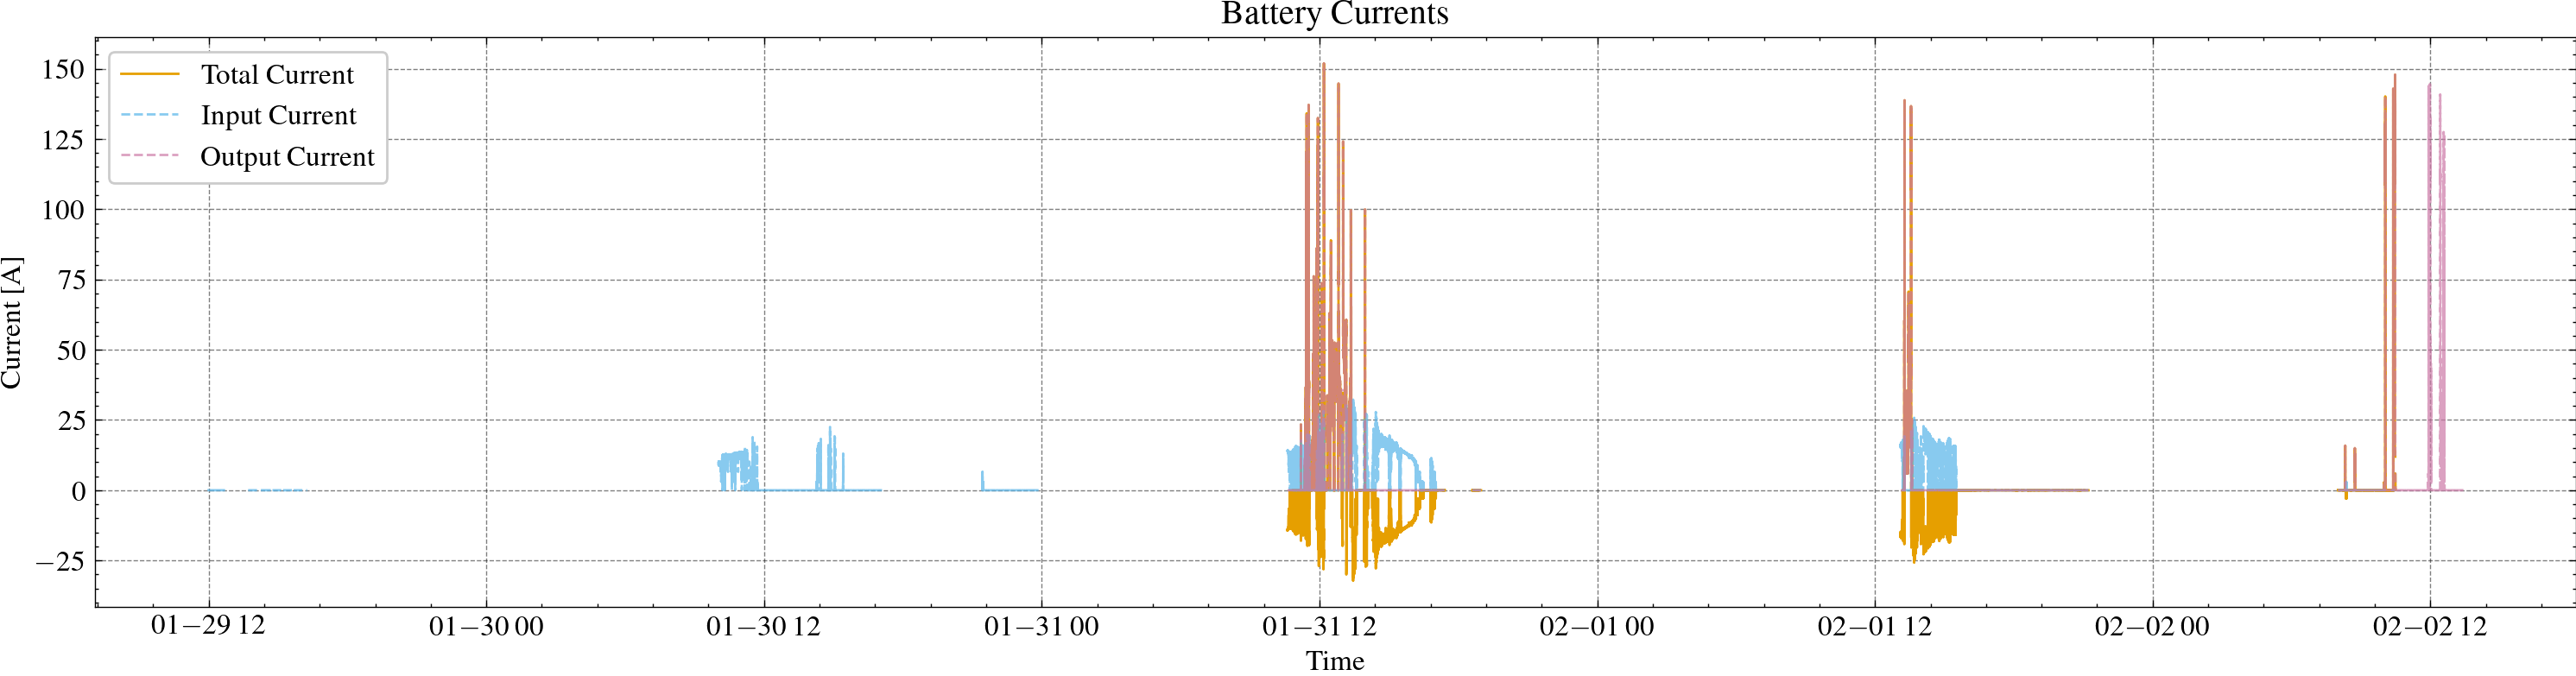

In [36]:
system_data["Battery Current"] = "Battery Current"
df[system_data["Battery Current"]] = (
    df[system_data["Battery Output Current"]] - df[system_data["Battery Input Current"]]
)

plt.figure(figsize=(15, 4))
plt.title("Battery Currents")
plt.plot(df.index, df[system_data["Battery Current"]], label="Total Current")
plt.plot(
    df.index,
    df[system_data["Battery Input Current"]],
    "--",
    alpha=0.7,
    label="Input Current",
)
plt.plot(
    df.index,
    df[system_data["Battery Output Current"]],
    "--",
    alpha=0.7,
    label="Output Current",
)
plt.xlabel("Time")
plt.ylabel("Current [A]")
plt.legend(loc="upper left")
plt.show()

# Motor Angular Speed

The sensor gives the data in RPM, we want it in rad/s


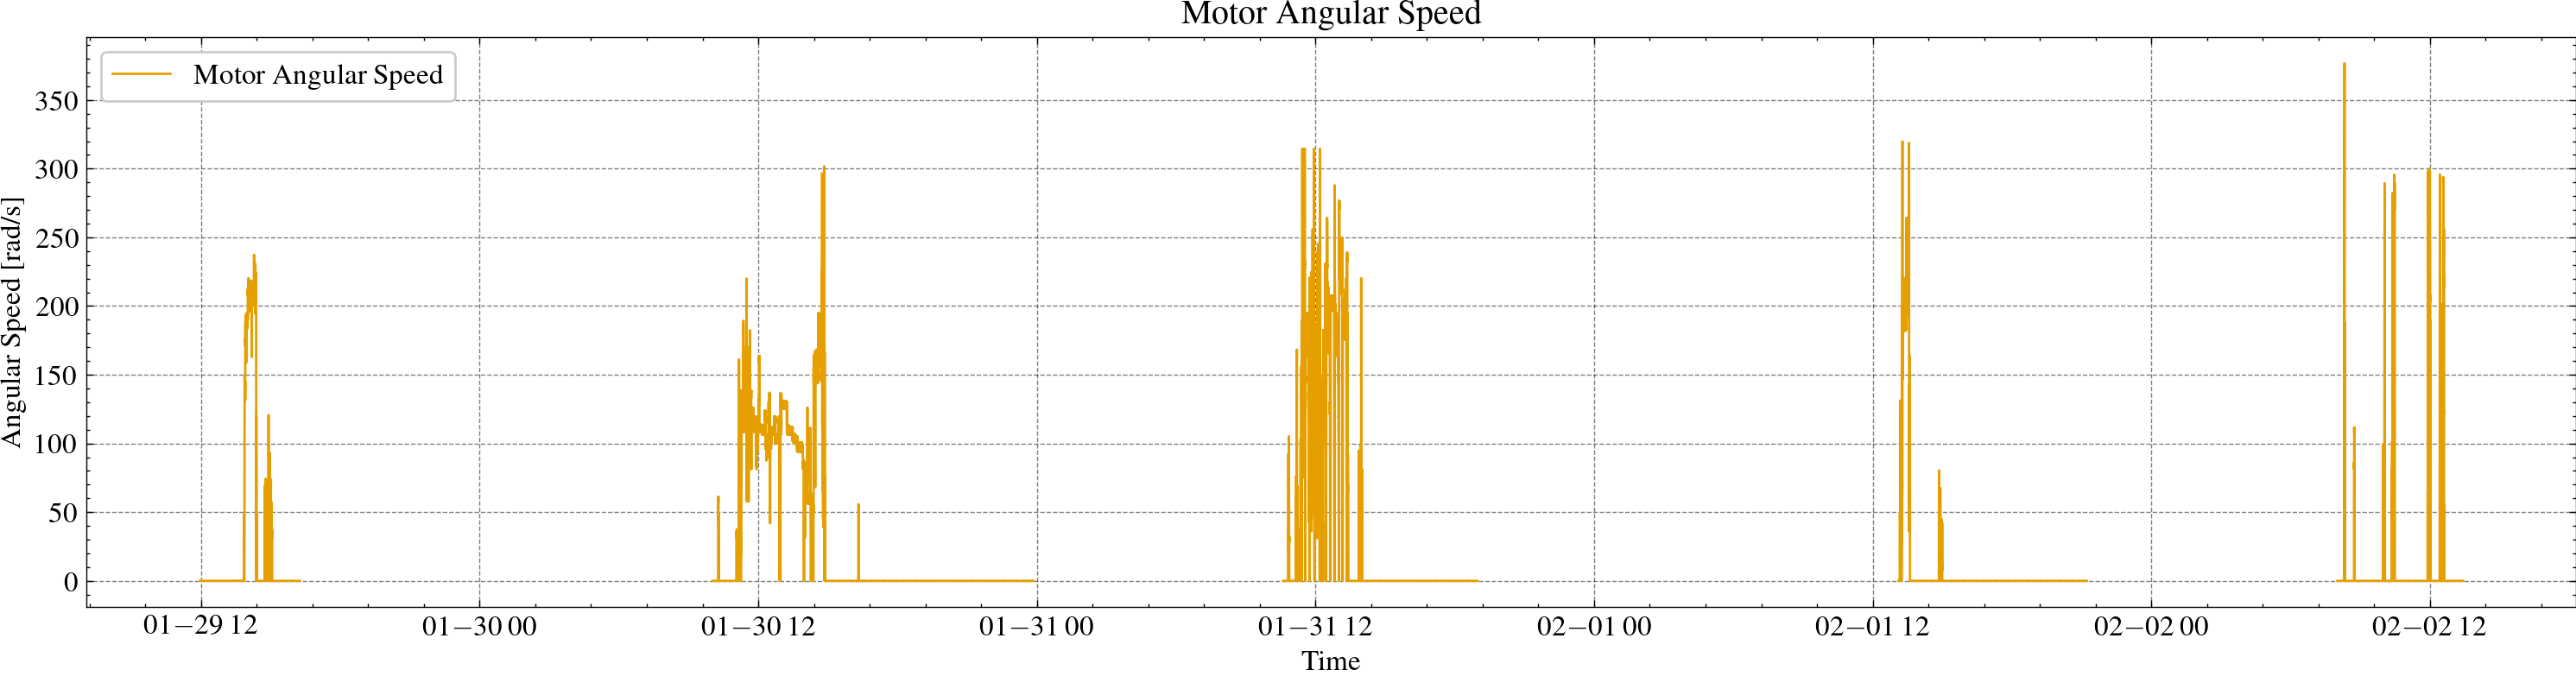

In [37]:
df[system_data["Motor Angular Speed"]] *= 2 * np.pi / 60

plt.figure(figsize=(15, 4))
plt.title("Motor Angular Speed")
plt.plot(df.index, df[system_data["Motor Angular Speed"]], label="Motor Angular Speed")
plt.xlabel("Time")
plt.ylabel("Angular Speed [rad/s]")
plt.legend(loc="upper left")
plt.show();

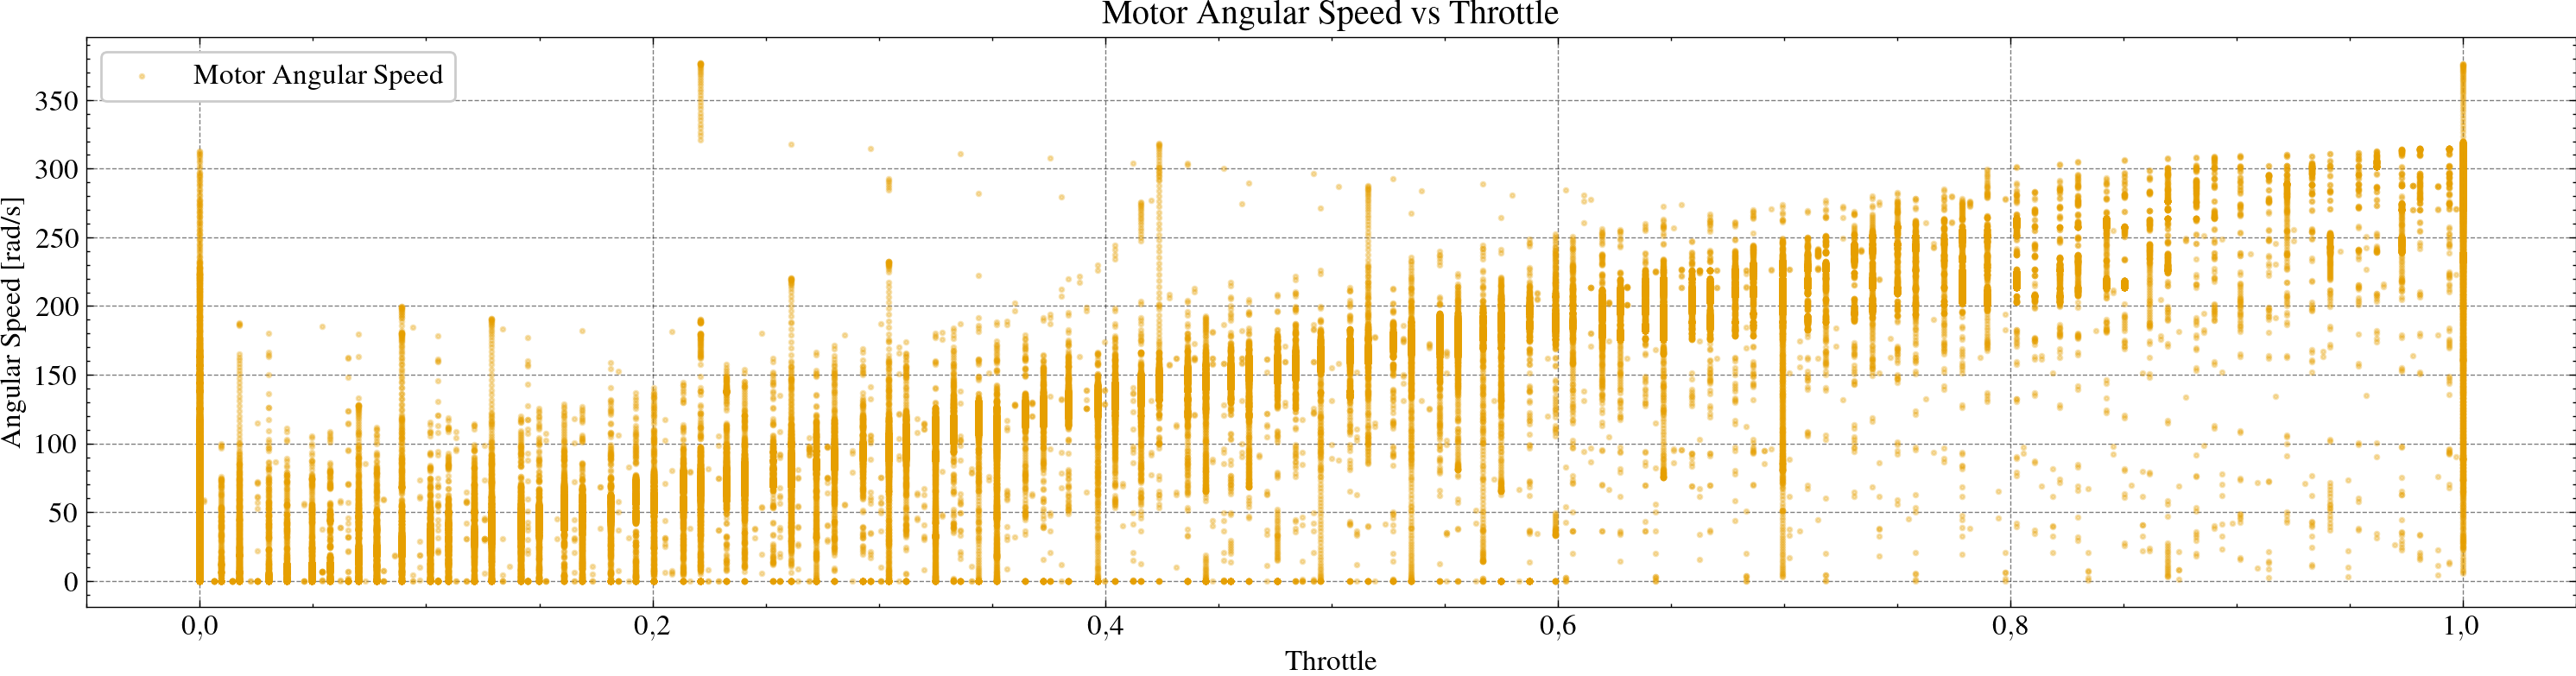

In [38]:
plt.figure(figsize=(15, 4))
plt.title("Motor Angular Speed vs Throttle")
plt.scatter(
    df[system_data["ESC Duty Cycle"]],
    df[system_data["Motor Angular Speed"]],
    label="Motor Angular Speed",
    s=3,
    alpha=0.3,
)
plt.xlabel("Throttle")
plt.ylabel("Angular Speed [rad/s]")
plt.legend(loc="upper left")
plt.show();

## Construct and save the new dataset


In [39]:
display(df.columns.to_list())

['MCC19_1__MEASUREMENTS__SIGNATURE',
 'MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_1__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_1__MEASUREMENTS__DT',
 'MCB19_2__MEASUREMENTS__SIGNATURE',
 'MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCB19_2__MEASUREMENTS__OUTPUT_CURRENT',
 'MCB19_2__MEASUREMENTS__INPUT_VOLTAGE',
 'MCB19_2__MEASUREMENTS__DT',
 'MCC19_3__MEASUREMENTS__SIGNATURE',
 'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__DT',
 'MIC19__MOTOR__SIGNATURE',
 'MIC19__MOTOR__MOTOR',
 'MIC19__MOTOR__D',
 'MIC19__MOTOR__I',
 'MIC19__MCS__SIGNATURE',
 'MIC19__MCS__BOAT_ON',
 'MIC19__PUMPS__SIGNATURE',
 'MIC19__PUMPS__PUMPS',
 'MCC19_4__MEASUREMENTS__SIGNATURE',
 'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__DT',
 'MSWI19__MCS__SIGNATURE',
 'MSWI19__MCS_

In [40]:
df_new = pd.DataFrame()
df_new.index = df.index

# exclude = ['Battery Cell Voltage', 'Battery Input Current', 'Battery Output Current']
exclude = []

for key, value in system_data.items():
    if key in exclude:
        continue

    if isinstance(value, str):
        df_new[key] = df[value]
        continue

    if isinstance(value, list):
        words = key.split(" ")
        for i, v in enumerate(value):
            words_copy = words.copy()
            words_copy.insert(1, str(i + 1))
            key = " ".join(words_copy)

            df_new[key] = df[v]

# Add solcast data:
df_new["Air Temperature"] = df["solcast_AirTemp"]
df_new["Solar POA"] = df["solcast_poa"]
df_new["Wind Speed"] = df["solcast_WindSpeed10m"]
df_new["Wind Direction"] = df["solcast_WindDirection10m"]

# Save
df_new.to_csv(f"../models/2020/boat_data_{period}.csv")

In [41]:
[print(c) for c in df_new.columns];

Battery Pack Voltage (MCS)
Battery 1 Pack Voltage (MCB)
Battery 2 Pack Voltage (MCB)
Battery 1 Pack Voltage (MCC)
Battery 2 Pack Voltage (MCC)
Battery 3 Pack Voltage (MCC)
Battery 4 Pack Voltage (MCC)
Battery 1 Cell Voltage (MSC)
Battery 2 Cell Voltage (MSC)
Battery 3 Cell Voltage (MSC)
Battery Input Current Sensor State
Battery Input Current
Battery Output Current Sensor State
Battery Output Current
ESC State
ESC Duty Cycle (MAM)
ESC Duty Cycle (MSWI)
ESC Ramp (MAM)
ESC Ramp (MSWI)
ESC Motor State (MSWI)
ESC Boat On (MSWI)
ESC Duty Cycle (MIC)
ESC Ramp (MIC)
ESC Motor State (MIC)
ESC Boat On (MIC)
Motor Angular Speed
MPPT 1 Input Voltage
MPPT 2 Input Voltage
MPPT 3 Input Voltage
MPPT 4 Input Voltage
MPPT 1 Output Voltage
MPPT 2 Output Voltage
MPPT 3 Output Voltage
MPPT 4 Output Voltage
MPPT 1 Input Current
MPPT 2 Input Current
MPPT 3 Input Current
MPPT 4 Input Current
MPPT 1 Duty Cycle
MPPT 2 Duty Cycle
MPPT 3 Duty Cycle
MPPT 4 Duty Cycle
MCB 1 Input Voltage
MCB 2 Input Voltage
MCB 1 

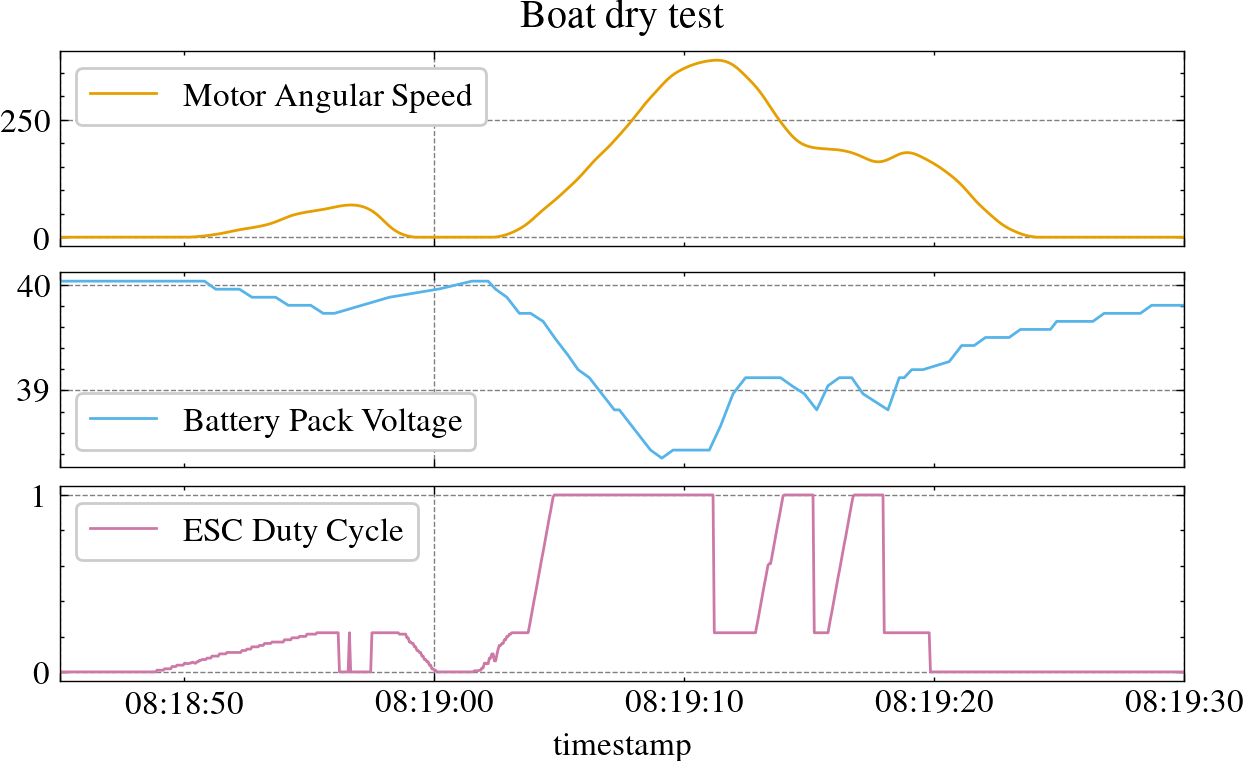

In [42]:
start3 = pd.Timestamp(year=2020, month=2, day=2, hour=8, minute=18, second=45)
end3 = pd.Timestamp(year=2020, month=2, day=2, hour=8, minute=19, second=30)
region3 = (df_new.index >= start3) & (df_new.index <= end3)

df_new.loc[
    region3,
    [
        "Motor Angular Speed",
        "Battery Pack Voltage",
        "ESC Duty Cycle",
    ],
].plot(subplots=True)
plt.suptitle("Boat dry test")
plt.show();